#**Clasificación de tumores del cáncer de mama aplicando técnicas de aprendizaje automático**

En este *notebook* se presenta el código aplicado para el análisis del *dataset* Breast Cancer Wisconsin (Diagnostic). Este conjunto de datos será estudiado, limpiado y tratado con diferentes algoritmos de aprendizaje automático. Al final, se compararán los resultados obtenidos por cada algoritmo y se extraerán las conclusiones correspondientes.

<a id='0'></a>
# **0. Índice**

* [**1. Configuración inicial y carga de datos**](#1)
  * [**1.1. Importación de librerías**](#1.1)
  * [**1.2. Configuración del *notebook***](#1.2)
  * [**1.3. Carga del conjunto de datos**](#1.3)  
* [**2. Limpieza de los datos**](#2)
  * [**2.1. Estado inicial de los datos**](#2.1)
  * [**2.2. Presencia de valores nulos**](#2.2)
  * [**2.3. Presencia de filas duplicadas**](#2.3)
  * [**2.4. Reestructuración de características**](#2.4)
* [**3. Análisis explotario de datos (EDA)**](#3)
  * [**3.1. Distribución de los datos**](#3.1)    
  * [**3.2. Presencia de outliers**](#3.2)
    * [**3.2.1. Visualización de outliers con boxplots**](#3.2.1)
    * [**3.2.2. Rango intercuartílico**](#3.2.2)
  * [**3.3. Correlación entre características**](#3.3)
    * [**3.3.1. Matriz de correlación**](#3.3.1)
    * [**3.3.2. Características altamente correlacionadas**](#3.3.2)
* [**4. Tratamiento de datos**](#4)
  * [**4.1. Eliminación de características altamente correlacionadas**](#4.1)
  * [**4.2. Estandarización de los datos**](#4.2)
  * [**4.3. RFE**](#4.3)
  * [**4.4. RFECV**](#4.4)  
* [**5. Creación del modelo**](#5)
  * [**5.1. Métricas de rendimiento**](#5.1)
  * [**5.2. Definición de modelos seleccionados**](#5.2)
  * [**5.3. Validación cruzada y definición de hiperparámetros**](#5.3)
  * [**5.4. Definición de evaluación del algoritmo individual**](#5.4)
  * [**5.5. Definición de evaluación del conjunto de algoritmos**](#5.5)
  * [**5.6. Evaluación de todos los conjuntos de datos**](#5.6)
* [**6. Conclusión**](#6)

<a id='1'></a>
#**1. Configuración inicial y carga de datos**

<a id='1.1'></a>
##**1.1. Importación de librerías**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings

<a id='1.2'></a>
##**1.2. Configuración del *notebook***

In [3]:
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

<a id='1.3'></a>
##**1.3. Carga del conjunto de datos**

In [57]:
# # Inicialmente se había importado desde Google Drive.
# # Para evitar posibles conflictos, la versión final empleará el dataset desde GitHub
# from google.colab import drive
# drive.mount('/content/drive')

# # Ruta al conjunto de datos en Google Drive
# dataset_path = '/content/drive/MyDrive/Colab Notebooks/data.csv'
# data = pd.read_csv(dataset_path)

Cargamos el conjunto de datos en la variable *data*, que nos servirá para realizar las operaciones iniciales, y procedemos a revisar el contenido de sus 5 primeras filas.

In [58]:
url = "https://raw.githubusercontent.com/adribatr/Breast_Cancer_Thesis/main/data.csv"
data = pd.read_csv(url)

In [59]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


En esta primera muestra de los datos, podemos apreciar que el conjunto de datos contiene 33 columnas; sin embargo, el *dataset* original estaba compuesto por 32 columnas. Esto se debe a que, al realizar la importación, se ha añadido automáticamente una columna adicional, 'Unnamed: 32'. Trataremos con esta situación más adelante.

<a id='2'></a>
#**2. Limpieza de los datos**

<a id='2.1'></a>
##**2.1. Estado inicial de los datos**

Para comprobar el estado inicial de los datos, mostraremos un resumen del *dataset* con data.info(), que incluirá el índice de cada columna, su nombre, la cantidad de valores no nulos y su tipo. Además, proporcionará un resumen de todos los tipos de datos presentes y la memoria utilizada por el conjunto de datos.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

De este resumen, podemos confirmar que el *dataset* consta de 569 instancias y 33 columnas, en su mayoría numéricas y libres de valores nulos, excepto algunos casos que examinaremos más adelante.

Podemos obtener información más detallada sobre las columnas utilizando la función describe(). Esta función nos proporcionará estadísticas descriptivas, incluyendo medidas centrales y de dispersión para cada columna **numérica** en nuestro conjunto de datos.

Estas estadísticas incluyen el conteo de valores, la media, la desviación estándar, los valores mínimo y máximo, así como los percentiles 25%, 50% (mediana) y 75%. Este análisis nos permite tener una visión general de la distribución y variabilidad de los datos numéricos en el conjunto.

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


La información obtenida nos permite observar, a primera vista, la posible existencia de valores extremos, como en 'area_se', donde la media es 40.337079 y el valor máximo es 542.2. Estudiaremos esta situación más a fondo en el apartado [3.2. Presencia de *outliers*](#3.2).

<a id='2.2'></a>
##**2.2. Presencia de valores nulos**

De las 569 instancias que tiene el conjunto de datos, cada una de las columnas está libre de valores nulos, excepto la última, 'Unnamed: 32'. Confirmemos esta información:

In [8]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Es comprensible que esta columna esté vacía, ya que no estaba presente en el conjunto de datos original y fue generada durante el proceso de importación.

<a id='2.3'></a>
##**2.3. Presencia de filas duplicadas**

Comprobamos la presencia de filas duplicadas en el conjunto de datos, considerando las siguientes situaciones:

1. Una paciente aparece dos o más veces en el conjunto, conservando el mismo número de identificación (id).
2. Dos pacientes diferentes comparten exactamente la misma información en todas las columnas, pero con números de identificación diferentes.

Estas verificaciones se realizan para identificar posibles duplicados en el conjunto de datos, ya sea que una paciente aparezca varias veces o que haya coincidencias exactas en los datos de dos pacientes diferentes (caso muy improbable considerando la cantidad de características diferentes).

In [9]:
duplicated_rows = data[data.duplicated()]
num_duplicated_rows = duplicated_rows.shape[0]
print(f"El dataset tiene {num_duplicated_rows} filas duplicadas.")

duplicated_rows_no_id = data[data.duplicated(subset=data.columns.difference(['id']))]
num_duplicated_rows_no_id = duplicated_rows_no_id.shape[0]
print(f"El dataset tiene {num_duplicated_rows_no_id} filas duplicadas (excluyendo la columna 'id').")

El dataset tiene 0 filas duplicadas.
El dataset tiene 0 filas duplicadas (excluyendo la columna 'id').


<a id='2.4'></a>
##**2.4. Reestructuración de características**

La columna 'Unnamed: 32', que se agregó después de importar el conjunto de datos al notebook, solo contiene valores nulos y carece de información relevante, por lo que procederemos a eliminarla. Además, la columna 'id' es simplemente un identificador único asociado a cada instancia y no contribuye significativamente al análisis; por lo tanto, también será eliminada.

In [10]:
data = data.drop(['Unnamed: 32', 'id'], axis=1)

Además, y como hemos visto antes, casi todas las columnas son de naturaleza numérica, excepto 'diagnosis', que es categórica. Según la descripción del conjunto de datos, los únicos valores que contiene esta columna son 'B' (benign) para indicar si un tumor es benigno, y 'M' (malignant) si un tumor es maligno. Comprobamos que realmente es así:

In [11]:
print("Valores únicos de la columna 'diagnosis':", list(data.diagnosis.unique()))

Valores únicos de la columna 'diagnosis': ['M', 'B']


Confirmamos que esta columna solo contiene dos valores, que representan las clases que utilizaremos para la clasificación de las instancias.

Dado que muchos algoritmos de aprendizaje automático requieren entradas numéricas, procederemos a asignar el valor 0 a las instancias benignas y el valor 1 a las instancias malignas.

In [12]:
data.diagnosis.replace({"B":0,"M":1}, inplace=True)
print("Valores únicos de la columna 'diagnosis':", list(data.diagnosis.unique()))

Valores únicos de la columna 'diagnosis': [1, 0]


<a id='3'></a>
#**3. Análisis explotario de datos (EDA)**

Procederemos a realizar un estudio más profundo de los datos presentes en este conjunto de datos, lo que se suele denominar como análisis exploratorio de datos o EDA, por sus siglas en inglés (*Exploratory Data Analysis*).

<a id='3.1'></a>
##**3.1. Distribución de los datos**

Iniciamos nuestro análisis exploratorio examinando la distribución de las dos clases en el conjunto de datos, con el objetivo de determinar si nos encontramos ante un dataset balanceado o desbalanceado.

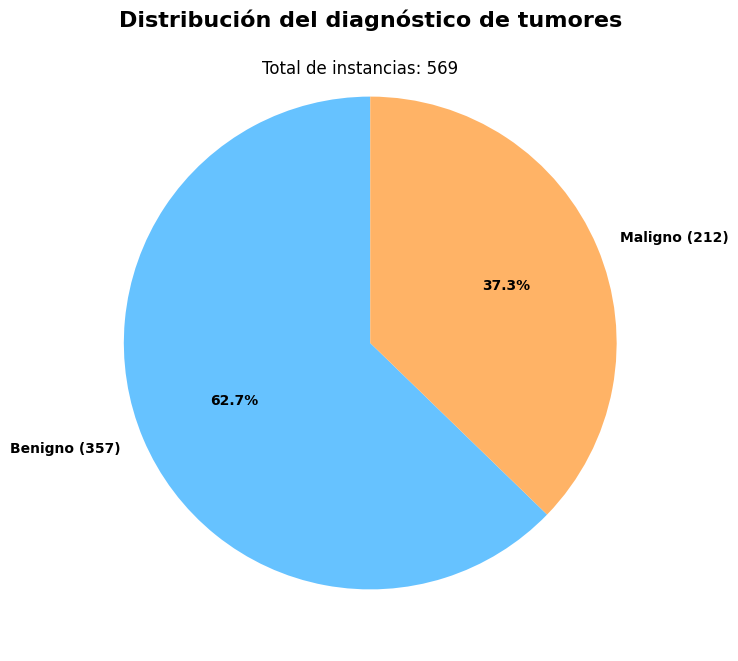

In [13]:
labels = ['Benigno', 'Maligno']
sizes = data['diagnosis'].value_counts()
total_instances = len(data)

# Creamos las etiquetas, incluyendo el número de instancias usando enumerate
labels_with_counts = [f"{label} ({sizes[i]})" for i, label in enumerate(labels)]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels_with_counts, autopct='%1.1f%%', startangle=90, colors=['#66c2ff', '#ffb366'], textprops={'weight': 'bold'})
plt.title('Distribución del diagnóstico de tumores', fontsize=16, color='black', weight='bold')
plt.suptitle(f'Total de instancias: {total_instances}', y=0.85, fontsize=12, color='black')

plt.show()

In [14]:
# Calculamos también el porcentaje y mostramos su valor con más de 1 decimal
percentage_benign = 100 * sizes[0] / total_instances
percentage_malignant = 100 * sizes[1] / total_instances

print(f'Porcentaje de tumores benignos: {percentage_benign}%')
print(f'Porcentaje de tumores malignos: {percentage_malignant}%')

Porcentaje de tumores benignos: 62.74165202108963%
Porcentaje de tumores malignos: 37.25834797891037%


Podemos observar que el *dataset* está desbalanceado, con un 62.7% de las instancias benignas y el 37.3% restante como malignas. A pesar de este desequilibrio, no consideramos que sea un desbalance altamente significativo, así que seguiremos trabajando con él.

Después de examinar los pesos de las clases, procederemos a explorar la distribución de las demás columnas en el conjunto de datos, es decir, las características específicas de los tumores. Para ello, utilizaremos histogramas que representen el estado conjunto de las instancias benignas y malignas, sin diferenciación entre clases.


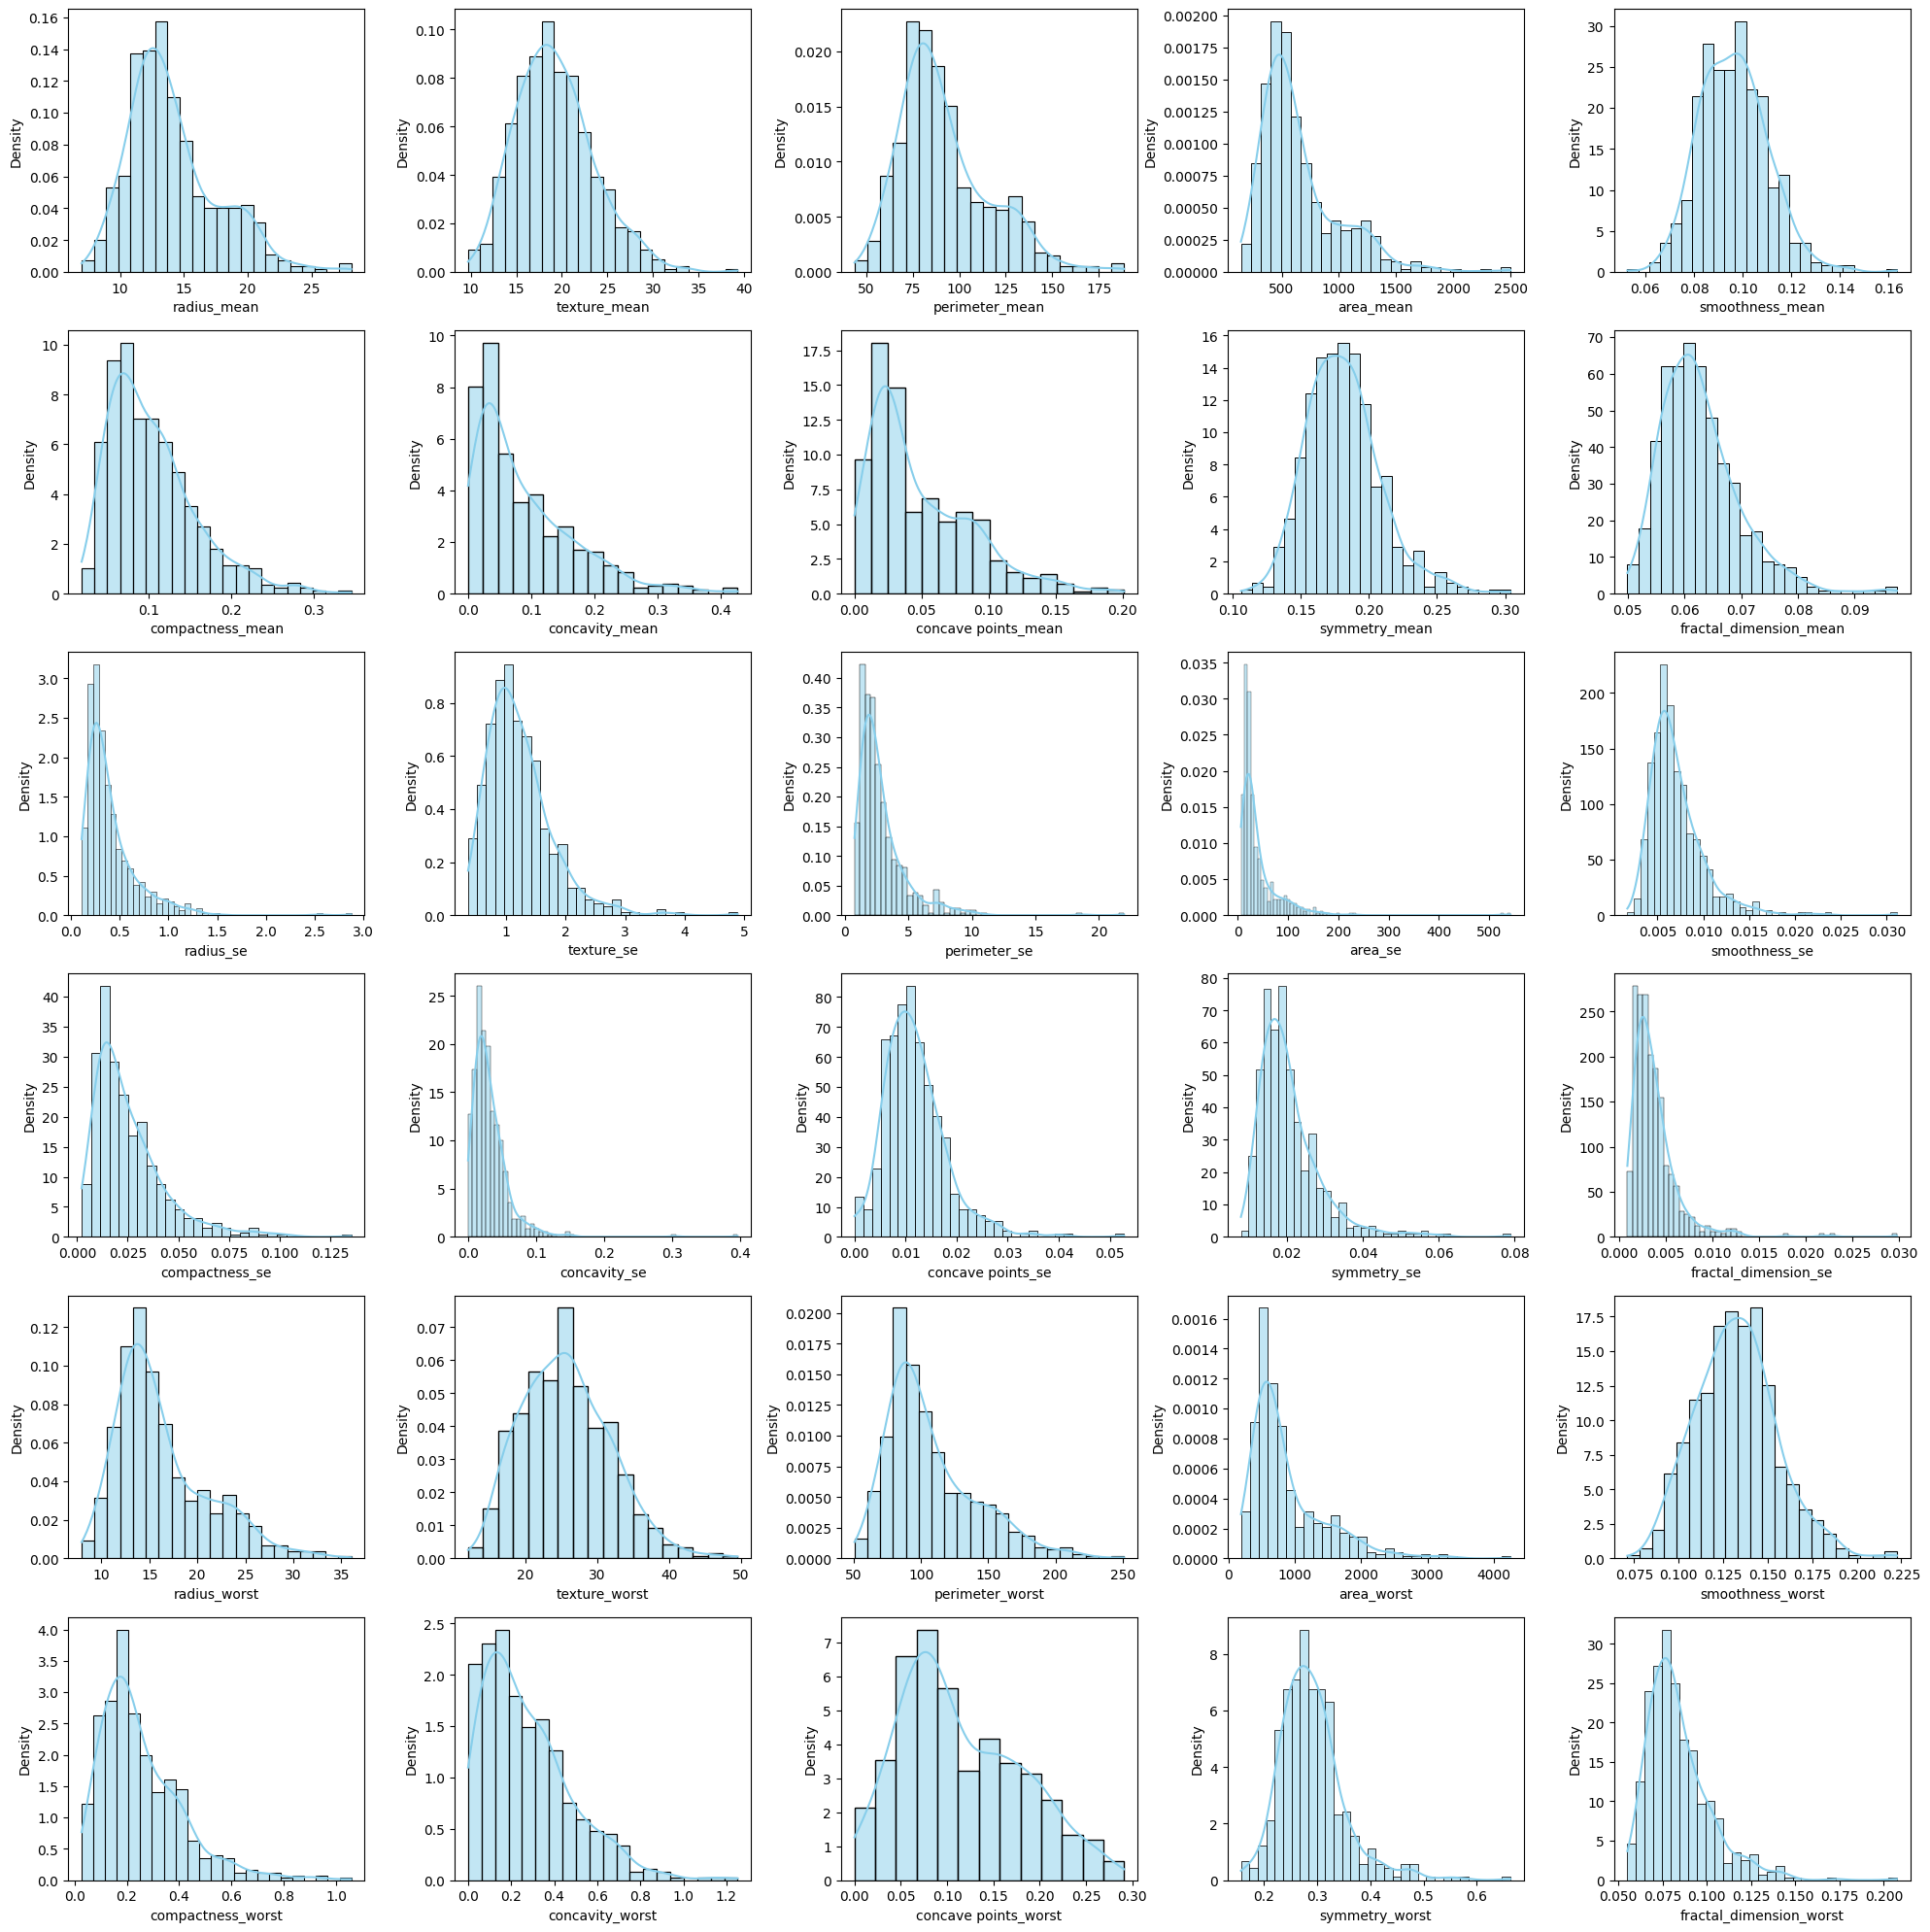

In [15]:
plt.figure(figsize=(20, 20))

# Comenzamos la iteración en el índice 1 (la segunda columna), para así omitir la columna 'diagnosis'
for i, column in enumerate(data.columns[1:], 1):
    plt.subplot(6, 5, i)
    sns.histplot(data[column], kde=True, color='skyblue', stat='density')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

Se puede apreciar que diversas columnas exhiben una distribución con sesgo positivo o hacia la derecha, lo que indica que los datos se concentran a la izquierda y la "cola" se extiende hacia la derecha. Este sesgo podría ser resultado de la presencia de valores extremos u *outliers* que afectan la distribución en esa dirección. En la sección [3.2. Presencia de *outliers*](#3.2), comprobaremos estos elementos.

Sin embargo, ¿las instancias siguen una distribución similar independientemente de su clase? Vamos a verificar esta suposición.

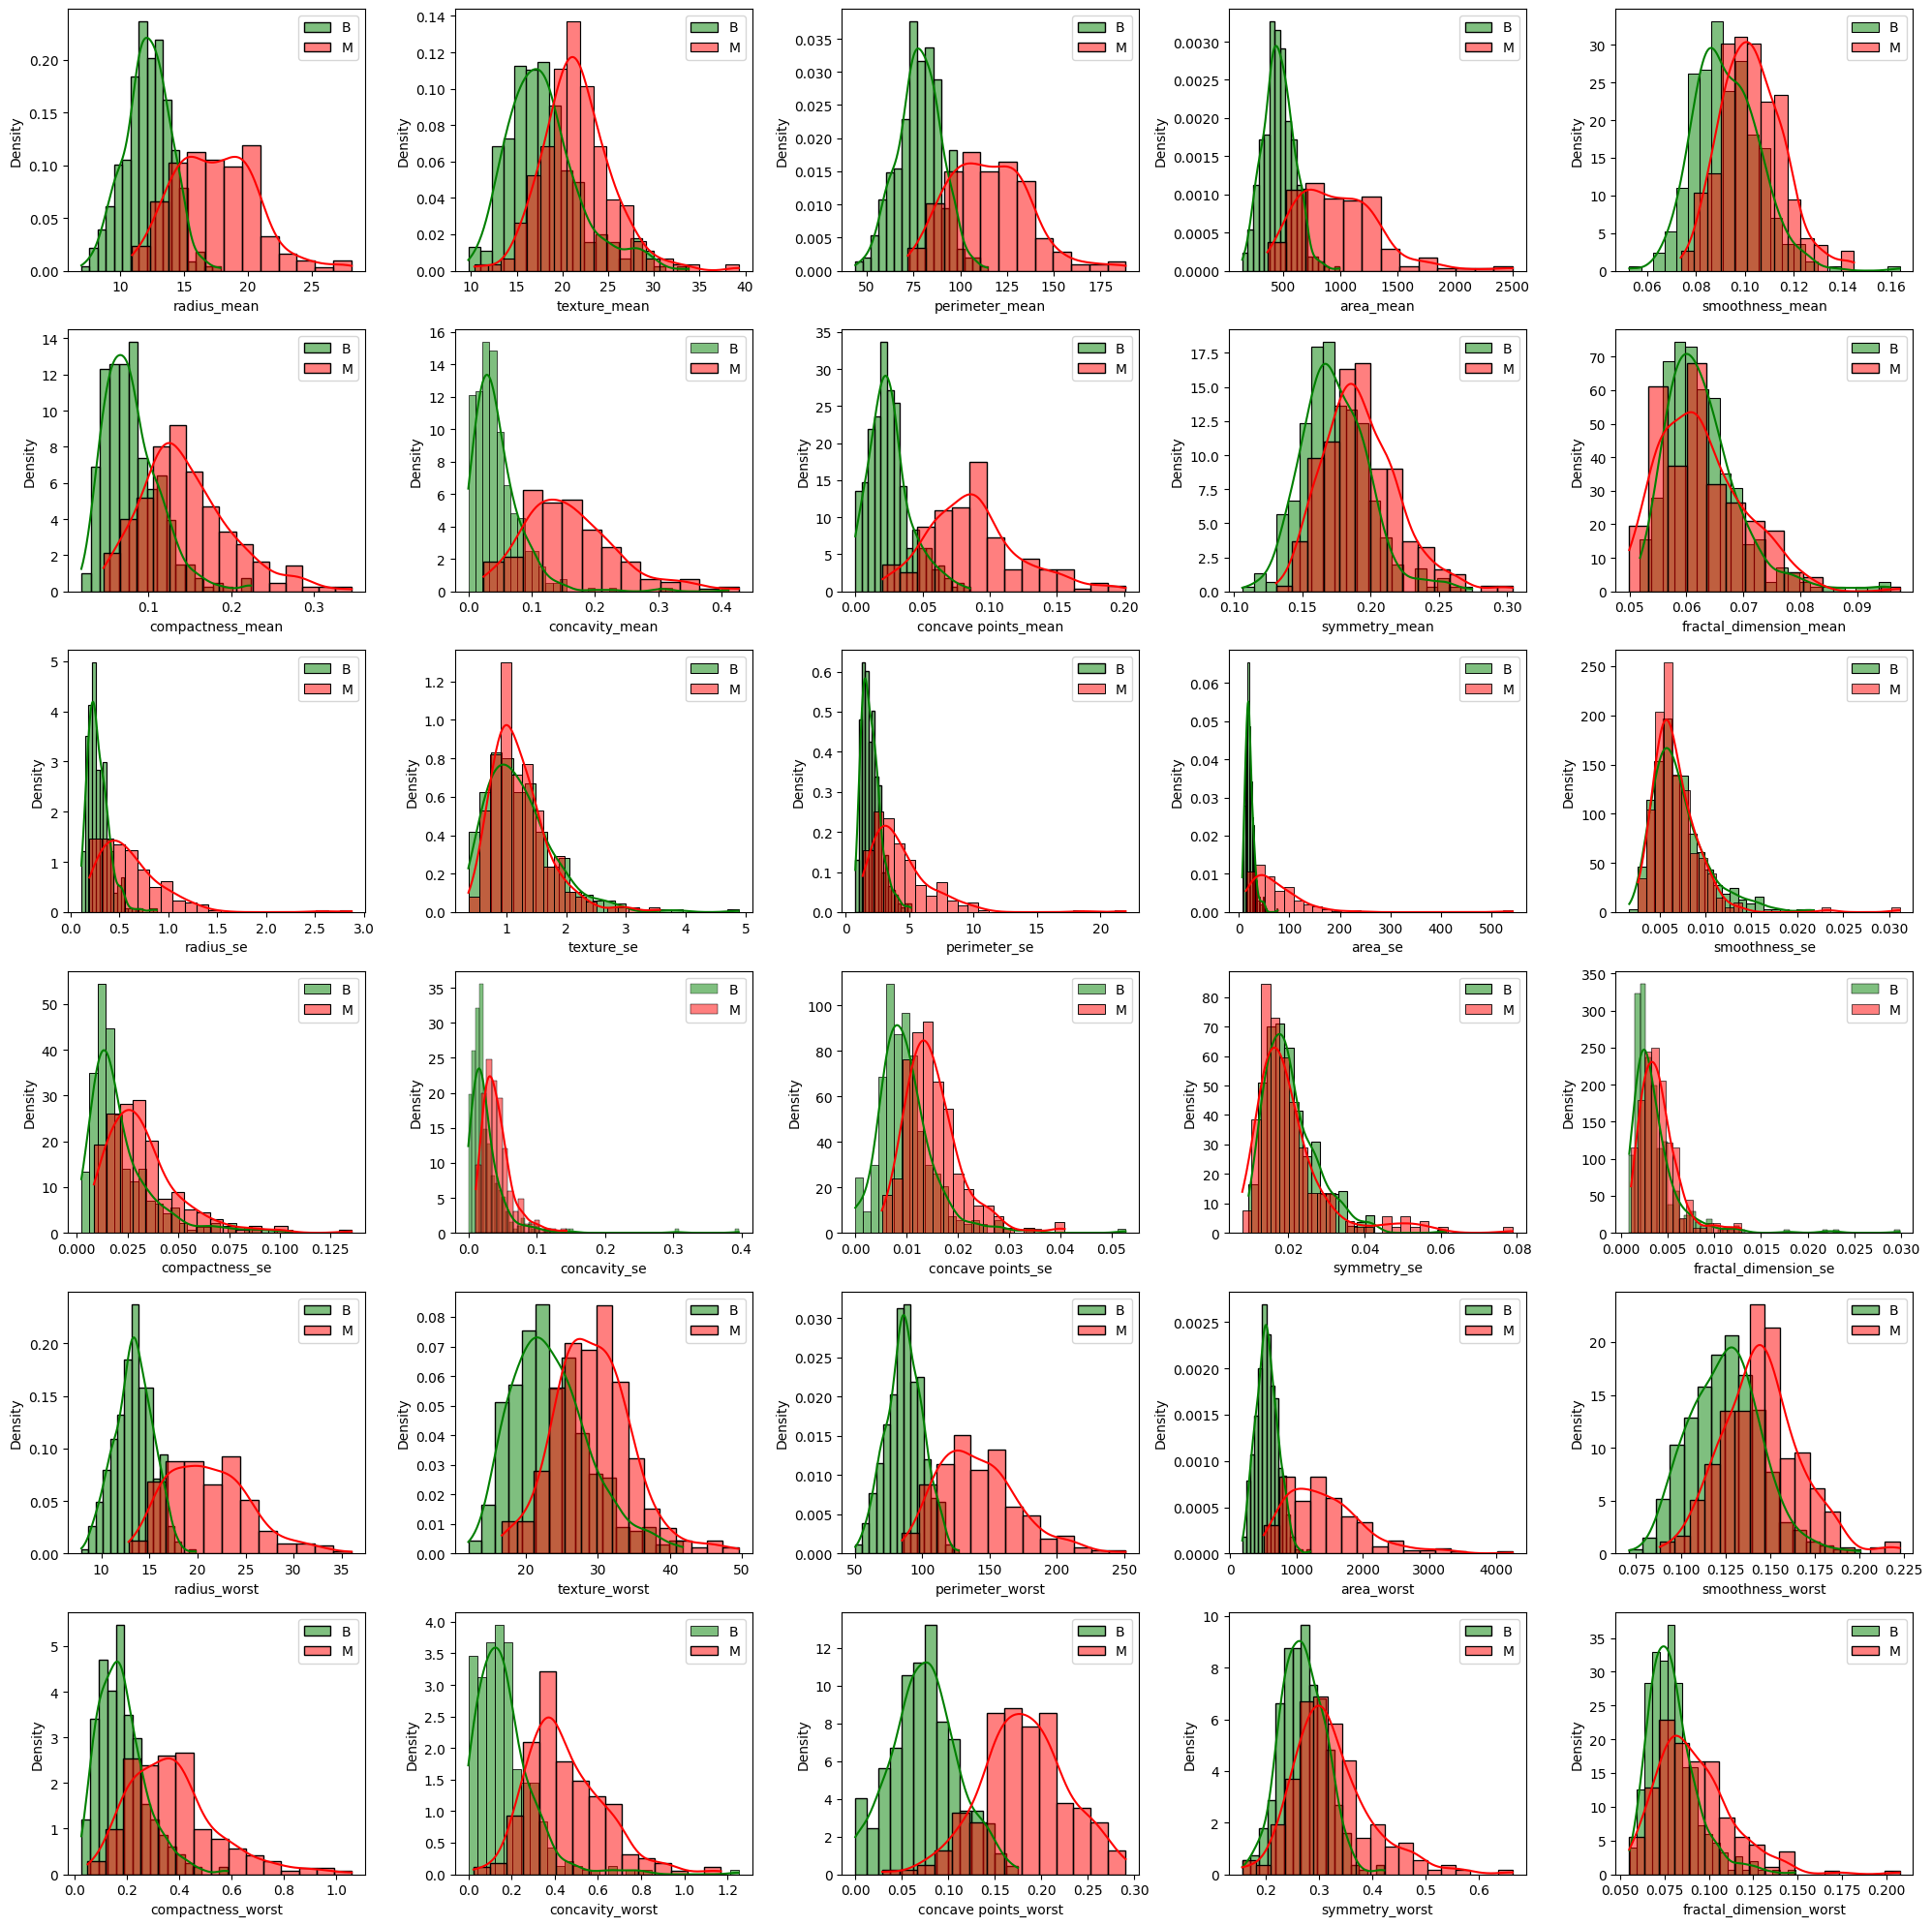

In [16]:
# Dividimos el dataset en 2 según la clase
dataM = data[data['diagnosis'] == 1]
dataB = data[data['diagnosis'] == 0]

plt.figure(figsize=(20, 20))

# Comenzamos la iteración en el índice 1 (la segunda columna), para así omitir la columna 'diagnosis'
for i, column in enumerate(data.columns[1:], 1):
    plt.subplot(6, 5, i)
    # Histograma para los tumores benignos (diagnosis=0)
    sns.histplot(dataB[column], kde=True, color='g', stat='density', label='B', alpha=0.5)
    # Histograma para los tumores malignos (diagnosis=1)
    sns.histplot(dataM[column], kde=True, color='r', stat='density', label='M', alpha=0.5)
    plt.xlabel(column)
    plt.legend()

plt.tight_layout()
plt.show()

En estos nuevos histogramas podemos ver que las características no se distribuyen de manera equitativa entre las instancias benignas y malignas. En la mayoría de los casos, las instancias malignas tienden a tener valores más altos que las instancias benignas, mostrando una tendencia a concentrarse hacia la derecha. En algunos casos, las distribuciones son prácticamente opuestas, como se evidencia en 'concave points_worst'.

Este patrón podría sugerir la presencia de propiedades o patrones más prominentes en tumores malignos. Por lo tanto, será importante considerar estas características como posibles indicadores clave al desarrollar modelos de clasificación. En este caso, tendremos en cuenta las columnas 'radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst' y 'concave points_worst'. Es importante destacar que la mención de estas columnas no implica su elección definitiva para nuestro modelo, sino que indican características que podrían adquirir importancia tras una investigación más detallada.

<a id='3.2'></a>
##**3.2. Presencia de *outliers***

Como hemos observado en nuestro análisis hasta ahora, existen indicios de que el conjunto de datos puede contener valores extremos, una posibilidad que se ha fortalecido durante la evaluación de la distribución de los datos. Ante este escenario, verificaremos la presencia de valores atípicos mediante el uso de boxplots.

<a id='3.2.1'></a>
###**3.2.1. Visualización de outliers con boxplots**

Al crear los boxplots, diferenciaremos por clases y, con el fin de facilitar la visualización, dividiremos los boxplots en subgrupos según estemos trabajando con las características "mean", "se" o "worst". Esto nos permitirá examinar de manera más específica la distribución de los datos en cada conjunto de características.

<ipython-input-17-173f379deb13>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data_mean[feature], x=data['diagnosis'], ax=axs[i], palette='Set1', showfliers=True)
<ipython-input-17-173f379deb13>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data_mean[feature], x=data['diagnosis'], ax=axs[i], palette='Set1', showfliers=True)
<ipython-input-17-173f379deb13>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data_mean[feature], x=data['diagnosis'], ax=axs[i], palette='Set1', showfliers=True)
<ipython-input-17-173f379deb13>:11: Futu

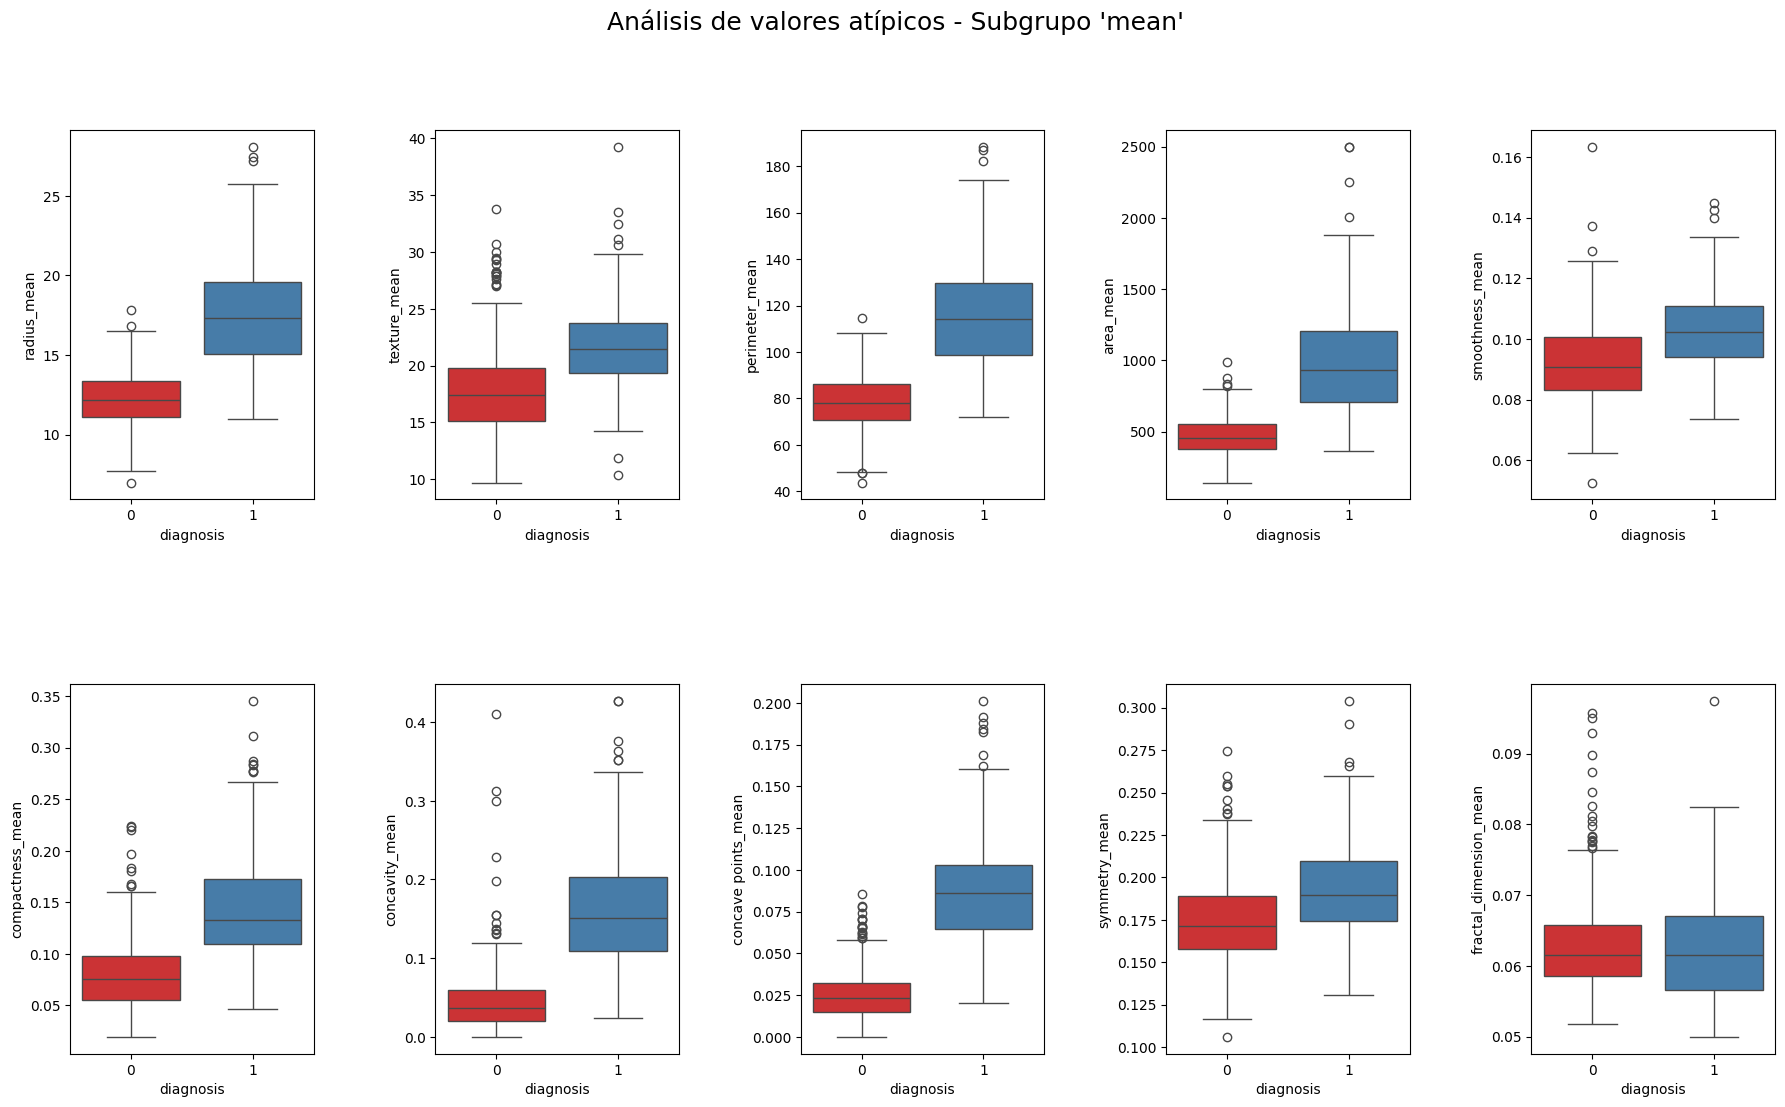

In [17]:
# Subgrupo 'mean'
features_mean = [col for col in data.columns if col.endswith('_mean')]
data_mean = data[features_mean]

fig, axs = plt.subplots(2, 5, figsize=(22, 12))
axs = axs.flatten()
plt.suptitle("Análisis de valores atípicos - Subgrupo 'mean'", size=18)

# Creación de boxplots individuales para cada columna del subgrupo
for i, feature in enumerate(features_mean):
    sns.boxplot(y=data_mean[feature], x=data['diagnosis'], ax=axs[i], palette='Set1', showfliers=True)

fig.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

<ipython-input-18-669c2e317a0c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data_se[feature], x=data['diagnosis'], ax=axs[i], palette='Set1', showfliers=True)
<ipython-input-18-669c2e317a0c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data_se[feature], x=data['diagnosis'], ax=axs[i], palette='Set1', showfliers=True)
<ipython-input-18-669c2e317a0c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data_se[feature], x=data['diagnosis'], ax=axs[i], palette='Set1', showfliers=True)
<ipython-input-18-669c2e317a0c>:11: FutureWarn

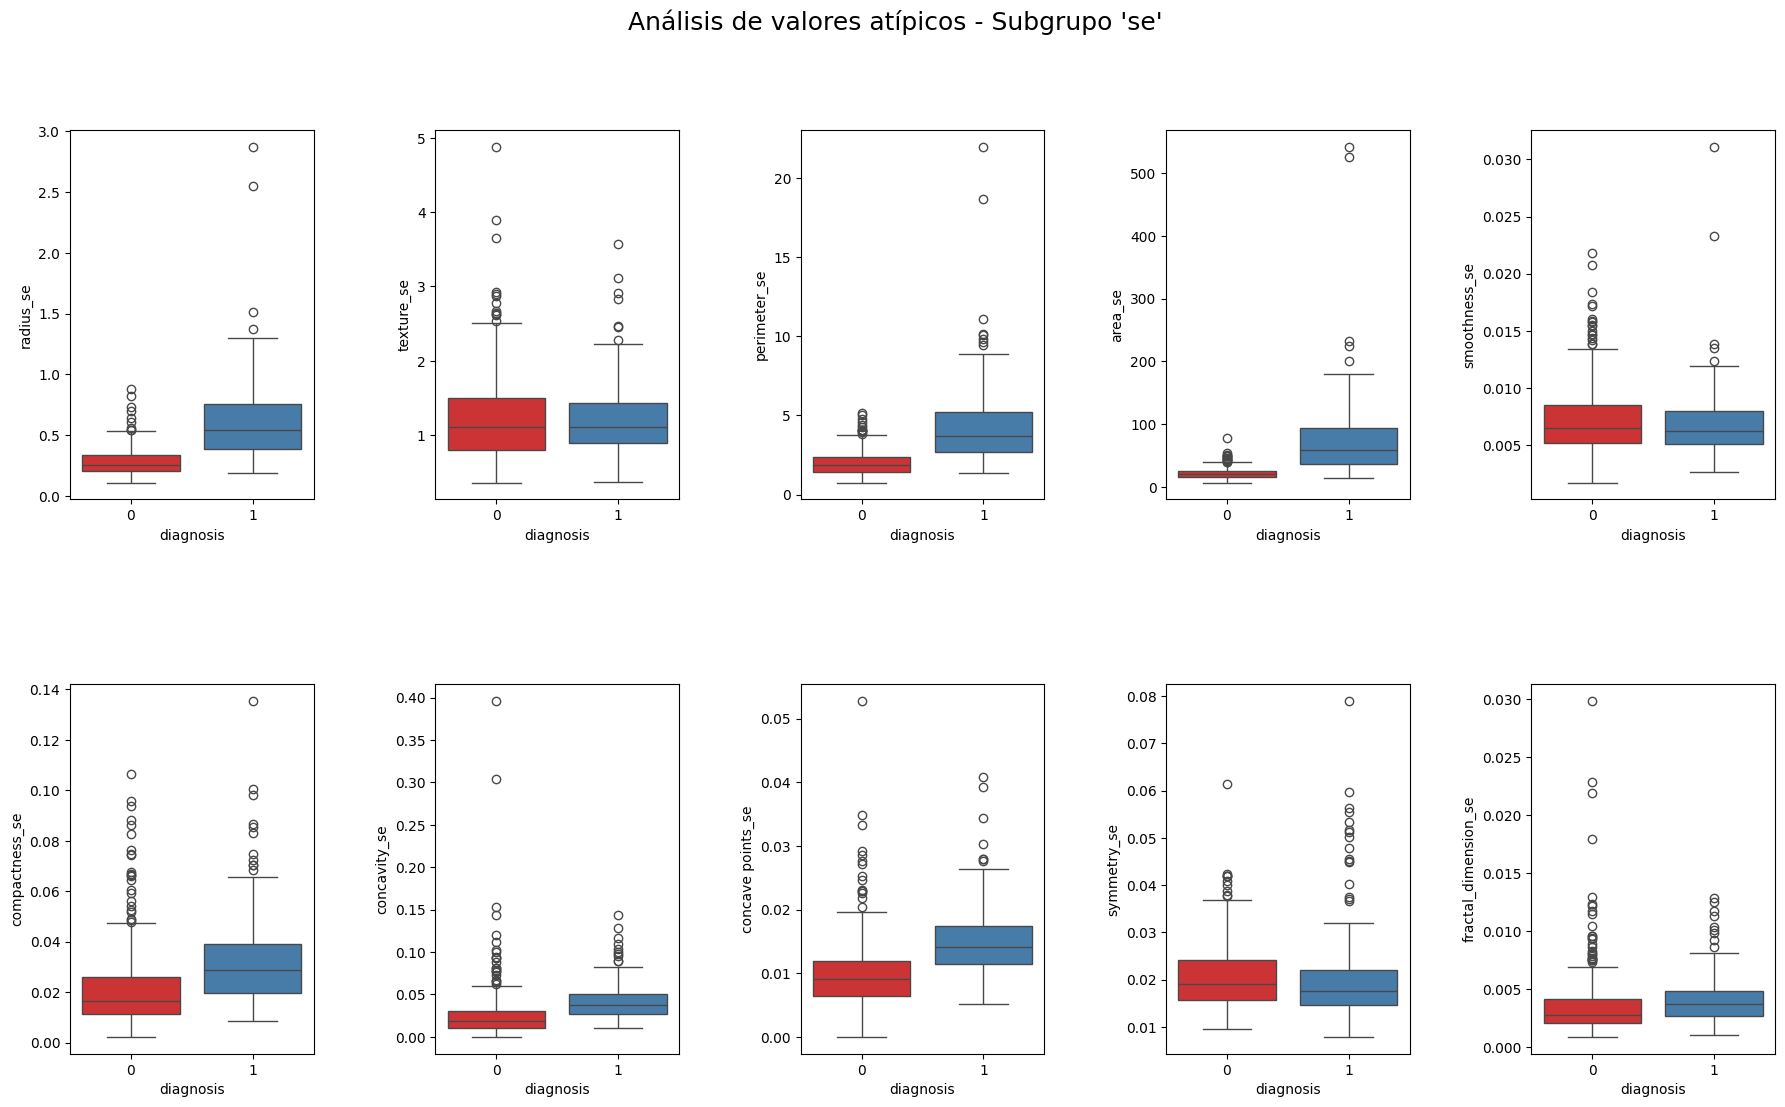

In [18]:
# Subgrupo 'se'
features_se = [col for col in data.columns if col.endswith('_se')]
data_se = data[features_se]

fig, axs = plt.subplots(2, 5, figsize=(22, 12))
axs = axs.flatten()
plt.suptitle("Análisis de valores atípicos - Subgrupo 'se'", size=18)

# Creación de boxplots individuales para cada columna del subgrupo
for i, feature in enumerate(features_se):
    sns.boxplot(y=data_se[feature], x=data['diagnosis'], ax=axs[i], palette='Set1', showfliers=True)

fig.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

<ipython-input-19-203573d63c57>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data_worst[feature], x=data['diagnosis'], ax=axs[i], palette='Set1', showfliers=True)
<ipython-input-19-203573d63c57>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data_worst[feature], x=data['diagnosis'], ax=axs[i], palette='Set1', showfliers=True)
<ipython-input-19-203573d63c57>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data_worst[feature], x=data['diagnosis'], ax=axs[i], palette='Set1', showfliers=True)
<ipython-input-19-203573d63c57>:11: F

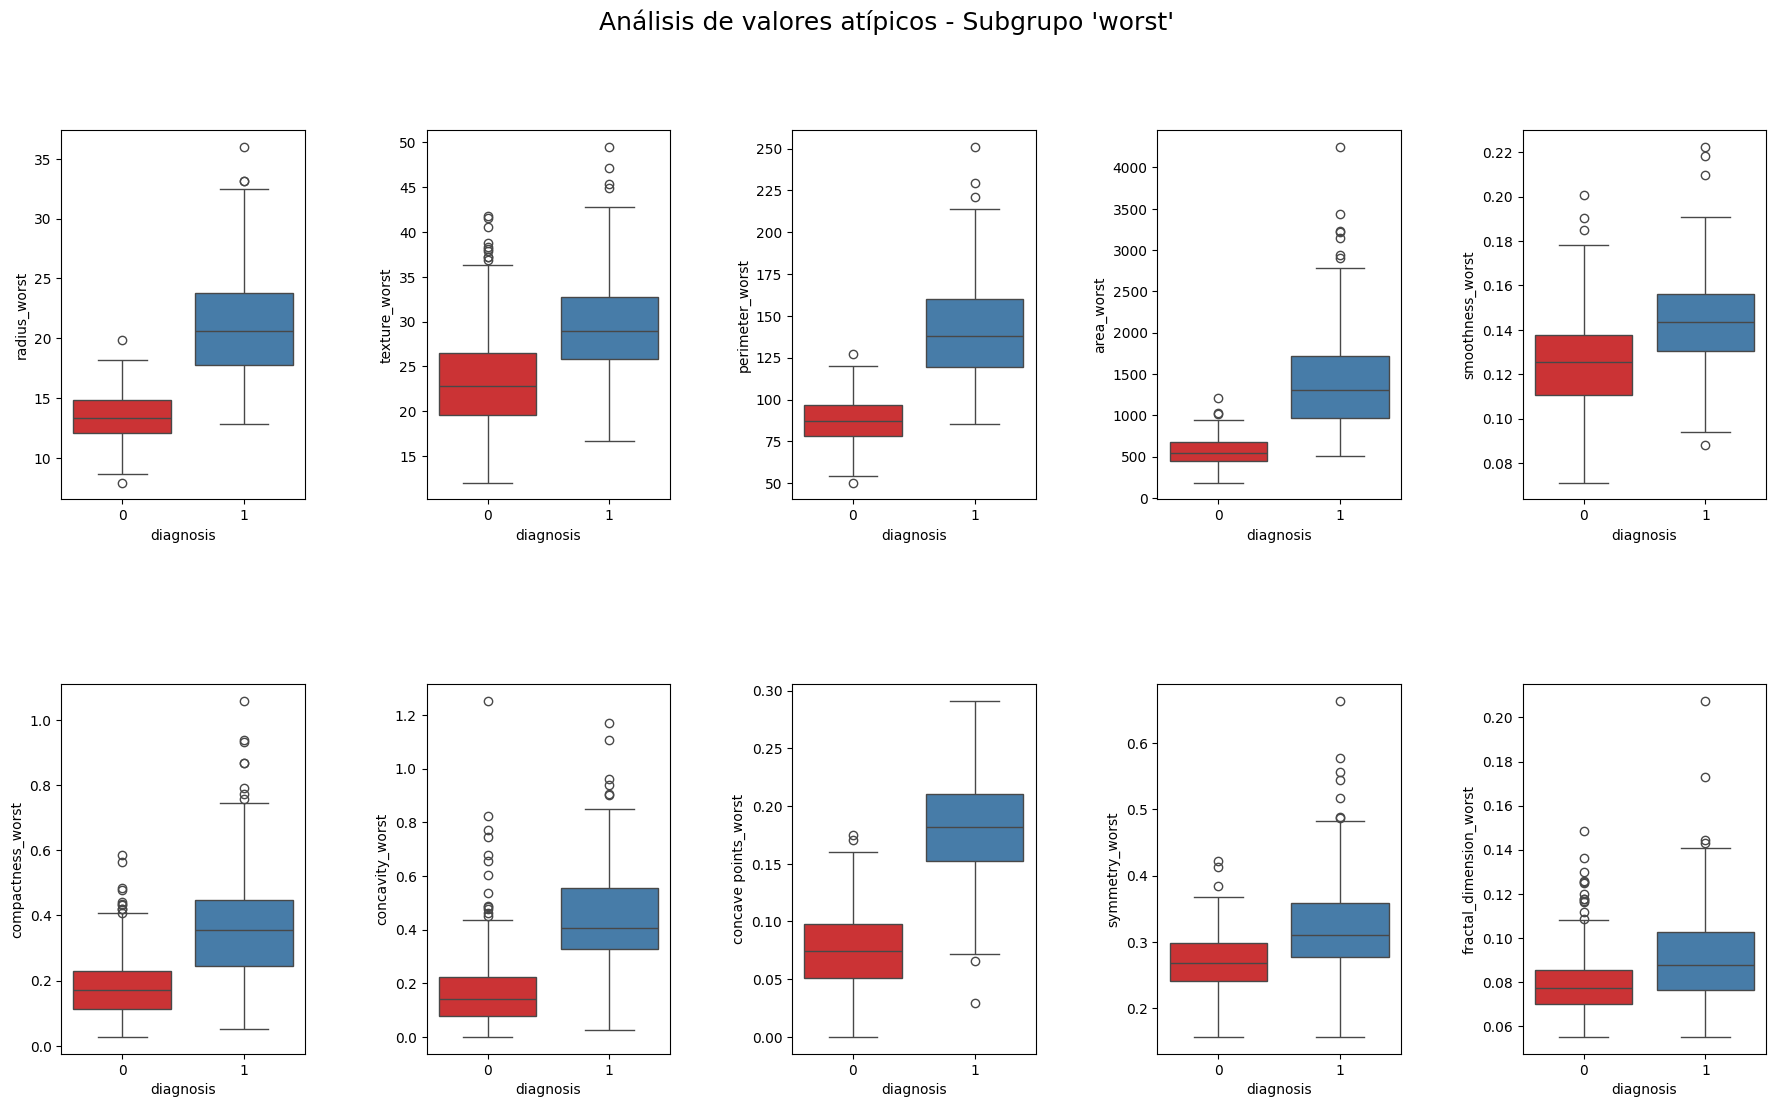

In [19]:
# Subgrupo 'worst'
features_worst = [col for col in data.columns if col.endswith('_worst')]
data_worst = data[features_worst]

fig, axs = plt.subplots(2, 5, figsize=(22, 12))
axs = axs.flatten()
plt.suptitle("Análisis de valores atípicos - Subgrupo 'worst'", size=18)

# Creación de boxplots individuales para cada columna del subgrupo
for i, feature in enumerate(features_worst):
    sns.boxplot(y=data_worst[feature], x=data['diagnosis'], ax=axs[i], palette='Set1', showfliers=True)

fig.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

Todas las características muestran valores atípicos; sin embargo, las características correspondientes al subgrupo 'se' parecen exhibir un número mayor de *outliers*. Verifiquemos el número de *outliers* en cada subgrupo utilizando el rango intercuartílico (IQR).

<a id='3.2.2'></a>
###**3.2.2. Rango intercuartílico**

Este término es una medida estadística que evalúa la dispersión de datos, calculada como la diferencia entre el tercer cuartil y el primer cuartil, siendo útil para identificar valores atípicos en un conjunto de datos. De esta manera, podremos cuantificar cuántos valores se encuentran fuera del rango (gráficamente, aquellos valores fuera de los "bigotes" de los boxplots).

In [20]:
# Calculamos el rango intercuartílico (IQR) para todas las columnas, excepto para 'diagnosis', y obtenemos los outliers existentes
features = data.drop('diagnosis', axis=1)
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1
outliers = (features < (Q1 - 1.5 * IQR)) | (features > (Q3 + 1.5 * IQR))

# Filtramos las columnas que terminan con '_mean', '_se' y '_worst'
columns_mean = [col for col in features.columns if col.endswith('_mean')]
columns_se = [col for col in features.columns if col.endswith('_se')]
columns_worst = [col for col in features.columns if col.endswith('_worst')]

# Obtenemos los outliers para cada subgrupo
outliers_mean = outliers[columns_mean]
outliers_se = outliers[columns_se]
outliers_worst = outliers[columns_worst]

# Imprimimos el número de outliers por subgrupo
print("Número de outliers para subgrupo 'mean':")
print(outliers_mean.sum())

print("\nNúmero de outliers para subgrupo 'se':")
print(outliers_se.sum())

print("\nNúmero de outliers para subgrupo 'worst':")
print(outliers_worst.sum())

# Número total de outliers para cada subgrupo
total_outliers_mean = outliers_mean.sum().sum()
total_outliers_se = outliers_se.sum().sum()
total_outliers_worst = outliers_worst.sum().sum()

total_instances = len(data)
percent_outliers_mean = (total_outliers_mean / total_instances) * 100
percent_outliers_se = (total_outliers_se / total_instances) * 100
percent_outliers_worst = (total_outliers_worst / total_instances) * 100

# Imprimimos el número total de outliers y el porcentaje para cada subgrupo
print("Número total de outliers para subgrupo 'mean':", total_outliers_mean)
print("Porcentaje de outliers para subgrupo 'mean': {:.2f}%".format(percent_outliers_mean))

print("\nNúmero total de outliers para subgrupo 'se':", total_outliers_se)
print("Porcentaje de outliers para subgrupo 'se': {:.2f}%".format(percent_outliers_se))

print("\nNúmero total de outliers para subgrupo 'worst':", total_outliers_worst)
print("Porcentaje de outliers para subgrupo 'worst': {:.2f}%".format(percent_outliers_worst))

Número de outliers para subgrupo 'mean':
radius_mean               14
texture_mean               7
perimeter_mean            13
area_mean                 25
smoothness_mean            6
compactness_mean          16
concavity_mean            18
concave points_mean       10
symmetry_mean             15
fractal_dimension_mean    15
dtype: int64

Número de outliers para subgrupo 'se':
radius_se               38
texture_se              20
perimeter_se            38
area_se                 65
smoothness_se           30
compactness_se          28
concavity_se            22
concave points_se       19
symmetry_se             27
fractal_dimension_se    28
dtype: int64

Número de outliers para subgrupo 'worst':
radius_worst               17
texture_worst               5
perimeter_worst            15
area_worst                 35
smoothness_worst            7
compactness_worst          16
concavity_worst            12
concave points_worst        0
symmetry_worst             23
fractal_dimension_wo

La presencia significativa de valores atípicos en el dataset se evidencia a través de porcentajes considerables entre los distintos subgrupos. En particular, la proporción de *outliers* en el subgrupo '_se', que representa el 55.36% de las instancias, indica una variabilidad considerable en las mediciones del error estándar.

Esta variación puede atribuirse a varias razones, como una marcada sensibilidad a condiciones variables o incluso a características biológicas específicas de las células mamarias, las cuales podrían estar contribuyendo a la discrepancia en las mediciones del error estándar.

Dado que estas características específicas podrían ser de interés, en este momento optamos por no abordar directamente los outliers identificados. No obstante, reconocemos su existencia y mantendremos la posibilidad de aplicar acciones futuras si se considera necesario.

<a id='3.3'></a>
##**3.3. Correlación entre características**

En esta sección, exploraremos la correlación entre las distintas características del conjunto de datos. La presencia de correlaciones puede señalar posibles interdependencias entre las variable, y cuando las variables presentan una alta correlación, suele indicar que ambas están ofreciendo información similar. En este escenario, mantener ambas podría dar lugar a multicolinealidad en modelos subsiguientes.

La multicolinealidad puede tener un impacto negativo en los modelos de aprendizaje automático, especialmente en aquellos que se basan en supuestos de independencia entre las variables predictoras. Por lo tanto, la eliminación de características altamente correlacionadas no solo mejora la interpretación del modelo, sino que también puede aumentar la precisión en algunos casos.

<a id='3.3.1'></a>
###**3.3.1. Matriz de correlación**

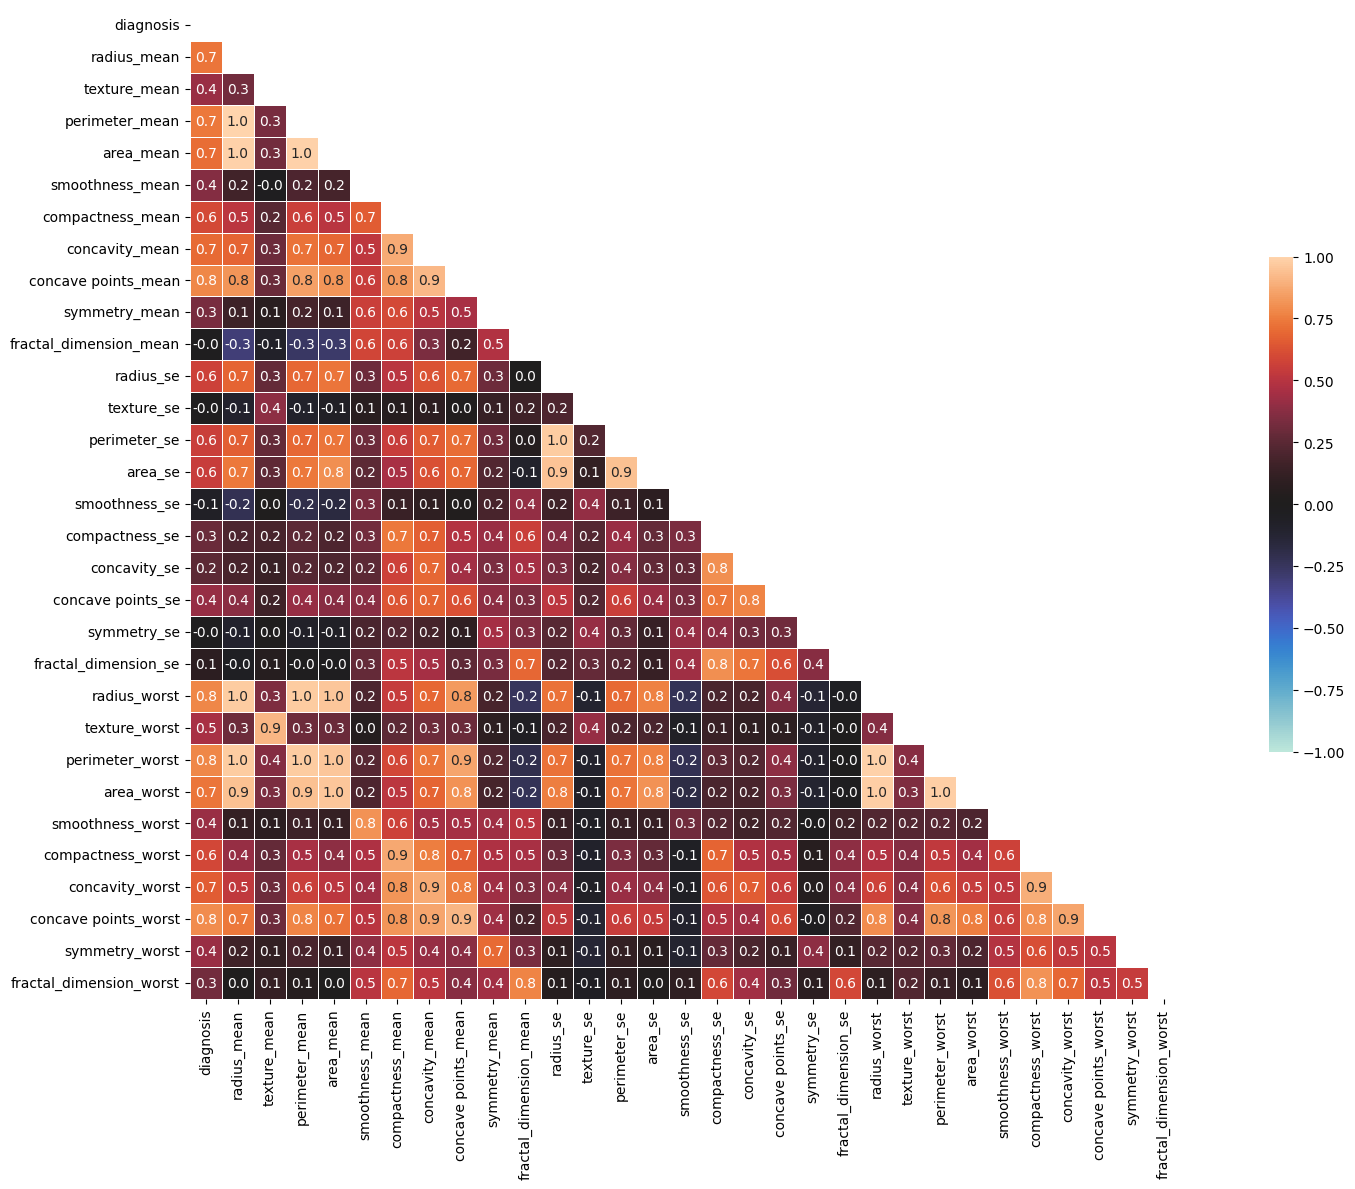

In [31]:
# Calculamos la matriz de correlación para todos los datos, incluido 'diagnosis'
corr_matrix = data.corr().round(2)

plt.figure(figsize=(18, 12))

# Ocultamos la mitad superior y seleccionamos un rango de colores
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Creamos la matriz de correlación con un 'heatmap'
sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True,
            fmt=".1f", annot_kws={"size": 10})  # Ajustar el tamaño de la fuente y el formato

plt.tight_layout()
plt.show()

En la matriz de correlación, se evidencia la presencia de varias características altamente correlacionadas, con valores superiores a 0.9, incluso alcanzando 1. Esta observación sugiere que estas variables, aunque independientes, comparten una información considerablemente redundante o casi idéntica. En otras palabras, la alta correlación entre estas características indica que su variabilidad está fuertemente relacionada, y puede haber una redundancia en la información que aportan al análisis.

<a id='3.3.2'></a>
###**3.3.2. Características altamente correlacionadas**

Para facilitar nuestro estudio, identifiquemos los pares de columnas que tienen una correlación superior a 0.9 y creemos una tabla para visualizarlos. En este caso, no consideraremos la correlación con 'diagnosis', que representa las clases del *dataset*.

In [22]:
# Calculamos la matriz de correlación para todos los datos, excepto para 'diagnosis'
corr_matrix = data.drop('diagnosis', axis=1).corr().round(4)

# Buscamos los pares de columnas con correlación superior a 0.9
highly_correlated_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            pair = (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
            highly_correlated_pairs.append(pair)

# Tabla con los pares de columnas altamente correlacionadas
correlation_table = pd.DataFrame(highly_correlated_pairs, columns=['Columna 1', 'Columna 2', 'Correlación'])
print(correlation_table)

              Columna 1             Columna 2  Correlación
0           radius_mean        perimeter_mean       0.9979
1           radius_mean             area_mean       0.9874
2           radius_mean          radius_worst       0.9695
3           radius_mean       perimeter_worst       0.9651
4           radius_mean            area_worst       0.9411
5          texture_mean         texture_worst       0.9120
6        perimeter_mean             area_mean       0.9865
7        perimeter_mean          radius_worst       0.9695
8        perimeter_mean       perimeter_worst       0.9704
9        perimeter_mean            area_worst       0.9415
10            area_mean          radius_worst       0.9627
11            area_mean       perimeter_worst       0.9591
12            area_mean            area_worst       0.9592
13       concavity_mean   concave points_mean       0.9214
14  concave points_mean  concave points_worst       0.9102
15            radius_se          perimeter_se       0.97

Se han identificado 21 pares de columnas con una correlación significativa, y algunas de estas columnas aparecen en múltiples pares. Esta repetición sugiere la presencia de multicolinealidad. Vamos a explorar más detalladamente qué columnas forman conjuntos de variables altamente correlacionadas.

In [23]:
# Inicializamos  un diccionario para almacenar combinaciones múltiples de columnas altamente correlacionadas
multiple_correlated_pairs = {}

# Buscamos las combinaciones múltiples de columnas con correlación superior a 0.9
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            pair = (corr_matrix.columns[i], corr_matrix.columns[j])
            # Agregar la combinación al diccionario
            if pair[0] in multiple_correlated_pairs:
                multiple_correlated_pairs[pair[0]].append(pair[1])
            else:
                multiple_correlated_pairs[pair[0]] = [pair[1]]

# Listas de columnas correlacionadas
for key, value in multiple_correlated_pairs.items():
    multiple_correlated_pairs[key] = ', '.join(value)

# Tabla con las combinaciones múltiples de columnas altamente correlacionadas
correlation_table_mult = pd.DataFrame(list(multiple_correlated_pairs.items()), columns=['Columna Base', 'Columnas correlacionadas'])
print(correlation_table_mult)

          Columna Base                                              Columnas correlacionadas
0          radius_mean  perimeter_mean, area_mean, radius_worst, perimeter_worst, area_worst
1         texture_mean                                                         texture_worst
2       perimeter_mean                  area_mean, radius_worst, perimeter_worst, area_worst
3            area_mean                             radius_worst, perimeter_worst, area_worst
4       concavity_mean                                                   concave points_mean
5  concave points_mean                                                  concave points_worst
6            radius_se                                                 perimeter_se, area_se
7         perimeter_se                                                               area_se
8         radius_worst                                           perimeter_worst, area_worst
9      perimeter_worst                                                

Gracias a esta nueva tabla, podemos obtener una visión más clara de las columnas que muestran multicolinealidad entre sí. Las observaciones derivadas de esta tabla incluyen:

* Las características 'radius_mean', 'perimeter_mean' y 'area_mean' están altamente correlacionadas, al igual que sus versiones 'se' y 'worst'. Esta correlación tiene sentido, ya que el perímetro y el área se derivan del radio, lo que implica que estas variables aportarían esencialmente la misma información sobre el tamaño físico de la observación. Por lo tanto, sería beneficioso elegir solo una de estas columnas para mejorar las predicciones del modelo.

* Las variables 'concavity_mean' y 'concave points_mean', que describen la forma del tumor, muestran una correlación significativa. Ambas características cuantifican aspectos diferentes de la concavidad en los núcleos celulares y, debido a su alta correlación, podrían proporcionar información redundante.

* Al explorar más a fondo esta relación, observamos que 'concavity_se' y 'concave points_se' presentan una correlación de 0.7718, mientras que 'concavity_worst' y 'concave points_worst' muestran una correlación de 0.8554. Aunque estas cifras no superan el umbral del 0.9, siguen siendo notables. Considerando también la alta correlación entre las medias de estas características, podría ser beneficioso seleccionar una característica de cada par, dado el vínculo existente entre 'concavity' y 'concave points'. (**Nota:** Los datos se pueden comprobar en el fragmento de código al final de esta sección).

* Las columnas 'texture_mean' y 'texture_worst', así como 'concave points_mean' y 'concave points_worst', están fuertemente correlacionadas. En estos casos, podríamos optar por seleccionar solo una de las variables de cada par, ya que una representa la media y la otra el "peor" valor, es decir, el valor más alto obtenido en esa característica.

En el apartado [4.1. Eliminación de características altamente correlacionadas](#4.1), realizaremos una selección de columnas en base a estos resultados.

In [24]:
conc_par_mean = data[['concavity_mean', 'concave points_mean']].corr().iloc[0, 1]
conc_par_se = data[['concavity_se', 'concave points_se']].corr().iloc[0, 1]
conc_par_worst = data[['concavity_worst', 'concave points_worst']].corr().iloc[0, 1]

print("Correlación para el par 'concavity'-'concave points', grupo 'mean': {:.4f}".format(conc_par_mean))
print("Correlación para el par 'concavity'-'concave points', grupo 'se': {:.4f}".format(conc_par_se))
print("Correlación para el par 'concavity'-'concave points', grupo 'worst': {:.4f}".format(conc_par_worst))

Correlación para el par 'concavity'-'concave points', grupo 'mean': 0.9214
Correlación para el par 'concavity'-'concave points', grupo 'se': 0.7718
Correlación para el par 'concavity'-'concave points', grupo 'worst': 0.8554


<a id='4'></a>
#**4. Tratamiento de datos**

Tras completar el análisis exploratorio de datos (EDA), avanzaremos hacia la selección de características para nuestro modelo. Dado el considerable número de columnas en el conjunto de datos, es aconsejable aplicar una reducción de dimensionalidad. En este contexto, se pueden emplear diversas técnicas, como la eliminación de características altamente correlacionadas, la aplicación de RFE, la combinación de RFE con validación cruzada, entre otras.

En este estudio, y en base al análisis previo, optamos por eliminar inicialmente aquellas variables fuertemente correlacionadas. Posteriormente, crearemos varios conjuntos de datos según apliquemos diferentes técnicas después de dicha eliminación. Este enfoque nos permitirá evaluar qué método de selección de características es más efectivo, considerando nuestra premisa de que variables altamente correlacionadas proporcionarían información muy similar.

<a id='4.1'></a>
##**4.1. Eliminación de características altamente correlacionadas**

Basándonos en los resultados obtenidos en la sección [3.3. Correlación entre características](#3.3), hemos decidido excluir las columnas relacionadas con perímetro (perimeter) y área (area). Además, eliminaremos 'texture_worst' debido a su fuerte correlación con 'texture_mean'.

Para determinar qué columnas eliminar entre las relacionadas con 'concavity' o 'concave points', calcularemos su correlación con la variable 'diagnosis'. De esta manera, elegiremos la característica con una mayor correlación, ya que se consideraría más relevante para la clasificación de tumores malignos. Vamos a calcular la correlación de cada característica y la media de las medidas 'mean', 'se', y 'worst' de cada una de ellas.

In [25]:
features_conc = ['concavity_mean', 'concave points_mean', 'concavity_se', 'concave points_se', 'concavity_worst', 'concave points_worst']

correlation_data = pd.DataFrame(index=features_conc, columns=['diagnosis'])
media_correlation_data = pd.DataFrame(index=['concavity', 'concave points'], columns=['diagnosis'])

for feature in features_conc:
    correlation = data[[feature, 'diagnosis']].corr().iloc[0, 1]
    correlation_data.at[feature, 'diagnosis'] = correlation

# Media de correlaciones para concavity y concave points
media_correlation_data.at['concavity', 'diagnosis'] = correlation_data.loc[['concavity_mean', 'concavity_se', 'concavity_worst']].astype(float).mean().mean()
media_correlation_data.at['concave points', 'diagnosis'] = correlation_data.loc[['concave points_mean', 'concave points_se', 'concave points_worst']].astype(float).mean().mean()

# Formateamos las columnas con 4 cifras decimales
correlation_data['diagnosis'] = correlation_data['diagnosis'].apply(lambda x: f"{x:.4f}")
media_correlation_data['diagnosis'] = media_correlation_data['diagnosis'].apply(lambda x: f"{x:.4f}")

print('Correlación de cada característica con \'diagnosis\'')
print(correlation_data)
print('\nMedia de correlaciones con \'diagnosis\'')
print(media_correlation_data)

Correlación de cada característica con 'diagnosis'
                     diagnosis
concavity_mean          0.6964
concave points_mean     0.7766
concavity_se            0.2537
concave points_se       0.4080
concavity_worst         0.6596
concave points_worst    0.7936

Media de correlaciones con 'diagnosis'
               diagnosis
concavity         0.5366
concave points    0.6594


Podemos observar que 'concave points' presenta una correlación media superior con 'diagnosis'. Por tanto, las siguientes columnas han sido seleccionadas para ser eliminadas:
* perimeter_mean
* perimeter_se
* perimeter_worst
* area_mean
* area_se
* area_worst
* texture_worst
* concavity_mean
* concavity_se
* concavity_worst

El estado del nuevo *dataset* es el siguiente:

In [26]:
# Lista de columnas a eliminar
columns_to_remove = [
    'perimeter_mean', 'perimeter_se', 'perimeter_worst',
    'area_mean', 'area_se', 'area_worst',
    'texture_worst', 'concavity_mean', 'concavity_se', 'concavity_worst'
]

data_reduced = data.drop(columns=columns_to_remove)

data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   smoothness_mean          569 non-null    float64
 4   compactness_mean         569 non-null    float64
 5   concave points_mean      569 non-null    float64
 6   symmetry_mean            569 non-null    float64
 7   fractal_dimension_mean   569 non-null    float64
 8   radius_se                569 non-null    float64
 9   texture_se               569 non-null    float64
 10  smoothness_se            569 non-null    float64
 11  compactness_se           569 non-null    float64
 12  concave points_se        569 non-null    float64
 13  symmetry_se              569 non-null    float64
 14  fractal_dimension_se     5

El conjunto de datos revisado, después de la eliminación de las variables altamente correlacionadas, se compone ahora de 21 columnas. Una de estas columnas representa la clase de las instancias, mientras que las 20 restantes describen las características de los tumores.

A partir de este punto, vamos a emplear diversas técnicas de selección de características sobre este conjunto de datos actualizado. Sin embargo, antes de proceder, llevaremos a cabo la normalización de los datos. Este proceso busca asegurar que todas las características se encuentren en la misma escala, preparando así nuestros datos para un análisis más efectivo.

<a id='4.2'></a>
##**4.2. Estandarización de los datos**

Cuando estandarizamos nuestros datos, nos aseguramos de que todas nuestras características contribuyan de manera equitativa durante el análisis. Evitamos que las variables con escalas más grandes dominen sobre aquellas con escalas más pequeñas.

Para normalizar los datos, existen diversas técnicas, como la normalización o la estandarización (también conocida como normalización Z-Score). En nuestro caso, optamos por la estandarización, método que consiste en ajustar las características para que tengan una media de cero y una desviación estándar de uno, y nos facilita la comparación entre diferentes características al ponerlas en la misma escala. En nuestro caso, aplicaremos la estandarización a todas las variables, excepto a 'diagnosis'.

Para verificar la correcta normalización de los datos, utilizaremos la función describe(), que nos proporcionará estadísticas resumidas, como la media y la desviación estándar, para cada característica después del proceso de estandarización. Este análisis nos permitirá asegurarnos de que los datos se han ajustado adecuadamente y están listos para la siguiente etapa del análisis.

In [27]:
# Guardamos temporalmente 'diagnosis', no necesitamos normalizar esta colunmna
diagnosis = data_reduced['diagnosis']
data_standard = data_reduced.drop(columns=['diagnosis'])

# Normalización Z-Score
data_standard = (data_standard - data_standard.mean()) / data_standard.std()
data_standard = pd.concat([diagnosis, data_standard], axis=1)
data_standard.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,3.725835e-01,0.483918,0.000000,0.000000,0.000000,1.000000,1.000000
radius_mean,569.0,-1.311195e-16,1.000000,-2.027864,-0.688779,-0.214893,0.468980,3.967796
texture_mean,569.0,6.243785e-17,1.000000,-2.227289,-0.725325,-0.104544,0.583662,4.647799
smoothness_mean,569.0,-8.366672e-16,1.000000,-3.109349,-0.710338,-0.034860,0.635640,4.766717
compactness_mean,569.0,1.998011e-16,1.000000,-1.608721,-0.746429,-0.221745,0.493423,4.564409
concave points_mean,569.0,-4.995028e-17,1.000000,-1.260710,-0.737295,-0.397372,0.646366,3.924477
symmetry_mean,569.0,1.748260e-16,1.000000,-2.741705,-0.702621,-0.071564,0.530313,4.480808
fractal_dimension_mean,569.0,4.838933e-16,1.000000,-1.818265,-0.722004,-0.178123,0.470569,4.906602
radius_se,569.0,2.497514e-16,1.000000,-1.058992,-0.623022,-0.291988,0.265866,8.899079
texture_se,569.0,-1.123881e-16,1.000000,-1.552898,-0.694198,-0.197324,0.466142,6.649429


La desviación estándar es 1 en todas las columnas que no sean 'diagnosis', y la media es próxima a 0, por lo que confirmamos que hemos realizado bien el cálculo de estandarización.

Tras este proceso, estamos preparados para aplicar diferentes técnicas de selección de características.

<a id='4.3'></a>
##**4.3. RFE**

*Recursive Feature Eliminatio*n (RFE) es una técnica de selección de características que se utiliza para identificar las variables más relevantes en un conjunto de datos. Se basa en la idea de eliminar de forma iterativa las características menos importantes, construir el modelo con las restantes y evaluar su rendimiento. Este proceso se repite hasta que se alcanza el número deseado de características; si no se sabe dicho número, se puede determinar utilizando técnicas como la validación cruzada para evaluar el rendimiento del modelo con diferentes cantidades de características.

Por otro lado, RFE puede emplear diferentes algoritmos como base para evaluar la importancia de las características. Algunos de los algoritmos comúnmente utilizados incluyen máquinas de soporte vectorial (SVM), regresión logística, árboles de decisión, entre otros.

Nosotros hemos escogido Random Forest como clasificador subyacente para RFE, debido a su capacidad para manejar conjuntos de datos complejos y su robustez frente al sobreajuste. Además, Random Forest puede proporcionar una medida de la importancia de las características directamente, lo que facilita el proceso de selección.

In [28]:
X = data_standard.drop(columns=['diagnosis'])
y = data_standard['diagnosis']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializamos el clasificador (Random Forest)
classifier = RandomForestClassifier(random_state=42)

# Inicializamos RFE sin especificar el número de características a seleccionar
rfe = RFE(estimator=classifier, step=1)

# Aplicamos RFE al conjunto de entrenamiento
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Visualizamos las características seleccionadas por RFE con sus importancias
selected_features_rfe = pd.DataFrame({
    'Característica': X.columns[rfe.support_],
    'Importancia': rfe.estimator_.feature_importances_
}).round(4)

# Ordenamos en orden descendente, en base a la importancia
selected_features_rfe = selected_features_rfe.sort_values(by='Importancia', ascending=False)

print("\nRFE - Características seleccionadas con importancias:")
print(selected_features_rfe)

# Número de características seleccionadas por RFE
num_selected_features_rfe = rfe.n_features_
print(f"\nNúmero de características seleccionadas por RFE: {num_selected_features_rfe}")


RFE - Características seleccionadas con importancias:
         Característica  Importancia
3   concave points_mean       0.2316
5          radius_worst       0.2175
8  concave points_worst       0.2013
0           radius_mean       0.1020
4             radius_se       0.0669
7     compactness_worst       0.0564
1          texture_mean       0.0411
2      compactness_mean       0.0356
9        symmetry_worst       0.0277
6      smoothness_worst       0.0200

Número de características seleccionadas por RFE: 10


La aplicación de RFE con Random Forest ha llevado a la selección de 10 columnas. Sin embargo, al entrenar un Random Forest, se generan múltiples árboles de decisión mediante la utilización de diferentes subconjuntos aleatorios de características y datos de entrenamiento. La aleatoriedad inherente a este proceso puede dar lugar a distintos niveles de importancia para las características en cada árbol, lo que incluye la posibilidad de variación del número de características, e incluso las características consideradas más importantes pueden fluctuar entre distintas ejecuciones del modelo.

Guardaremos las características seleccionadas en una variable para su posterior uso en la aplicación de los algoritmos de aprendizaje automático.

In [29]:
selected_columns_rfe = X.columns[rfe.support_]
data_RFE = pd.DataFrame(data_standard['diagnosis'])
data_RFE[selected_columns_rfe] = data_standard[selected_columns_rfe]

data_RFE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diagnosis             569 non-null    int64  
 1   radius_mean           569 non-null    float64
 2   texture_mean          569 non-null    float64
 3   compactness_mean      569 non-null    float64
 4   concave points_mean   569 non-null    float64
 5   radius_se             569 non-null    float64
 6   radius_worst          569 non-null    float64
 7   smoothness_worst      569 non-null    float64
 8   compactness_worst     569 non-null    float64
 9   concave points_worst  569 non-null    float64
 10  symmetry_worst        569 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 49.0 KB


<a id='4.4'></a>
##**4.4. RFECV**

Durante nuestras evaluaciones, observamos que el número de características seleccionadas ha sido consistente mediante el uso de RFE, con 10 características. Sin embargo, para mejorar aún más esta elección, podemos emplear validación cruzada (*cross-validation*) mediante la técnica conocida como RFECV (*Recursive Feature Elimination with Cross-Validation*). En nuestro caso, especificaremos el uso de 10 (k) divisiones para la validación cruzada y evaluaremos la cantidad de características seleccionadas en este proceso.

In [30]:
X = data_standard.drop(columns=['diagnosis'])
y = data_standard['diagnosis']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializamos el clasificador (Random Forest)
classifier = RandomForestClassifier(random_state=42)

# Inicializamos RFECV utilizando el clasificador
rfecv = RFECV(estimator=classifier, step=1, cv=10)  # Puedes ajustar 'cv' según tus necesidades

# Aplicamos RFECV al conjunto de entrenamiento
X_train_rfecv = rfecv.fit_transform(X_train, y_train)

# Visualizamos las características seleccionadas por RFECV con sus importancias
selected_features_rfecv = pd.DataFrame({
    'Característica': X.columns[rfecv.support_],
    'Importancia': rfecv.estimator_.feature_importances_
}).round(4)

# Ordenamos en orden descendente, en base a la importancia
selected_features_rfecv = selected_features_rfecv.sort_values(by='Importancia', ascending=False)

print("\nRFECV - Características seleccionadas con importancias:")
print(selected_features_rfecv)

# Número de características seleccionadas por RFECV
num_selected_features_rfecv = rfecv.n_features_
print(f"\nNúmero de características seleccionadas por RFECV: {num_selected_features_rfecv}")


RFECV - Características seleccionadas con importancias:
         Característica  Importancia
7  concave points_worst       0.2852
3   concave points_mean       0.2134
5          radius_worst       0.2030
0           radius_mean       0.1056
4             radius_se       0.0522
1          texture_mean       0.0446
6     compactness_worst       0.0417
2      compactness_mean       0.0313
8        symmetry_worst       0.0230

Número de características seleccionadas por RFECV: 9


La implementación de la validación cruzada mediante RFE nos señala que, después de 10 iteraciones, el número óptimo de características es de 9. Este número apenas ha reducido el número propuesto por RFE, con 10 columnas, por lo que ya estábamos cerca de la cantidad de variables necesarias para un buen rendimiento en nuestro modelo.

Al igual que con RFE, guardaremos los datos tratados con RFECV para probar los distintos algoritmos de clasificación.

In [32]:
# Obtenemos las características seleccionadas por RFECV
selected_columns_rfecv = X.columns[rfecv.support_]

# Creamos un nuevo DataFrame con las características seleccionadas y 'diagnosis'
data_RFECV = pd.DataFrame(data_standard['diagnosis'])

# Se añaden las características seleccionadas por RFECV al nuevo DataFrame
data_RFECV[selected_columns_rfecv] = data_standard[selected_columns_rfecv]

data_RFECV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diagnosis             569 non-null    int64  
 1   radius_mean           569 non-null    float64
 2   texture_mean          569 non-null    float64
 3   compactness_mean      569 non-null    float64
 4   concave points_mean   569 non-null    float64
 5   radius_se             569 non-null    float64
 6   radius_worst          569 non-null    float64
 7   compactness_worst     569 non-null    float64
 8   concave points_worst  569 non-null    float64
 9   symmetry_worst        569 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 44.6 KB


<a id='5'></a>
#**5. Creación del modelo**

Los datos han sido preparados y están listos para ser utilizados por los diversos algoritmos de machine learning de clasificación supervisada que hemos escogido en este estudio.

En nuestra estrategia inicial, nos propusimos identificar las métricas de rendimiento esenciales para evaluar cada algoritmo, teniendo en cuenta la naturaleza del conjunto de datos: un problema de clasificación binaria.

Posteriormente, tras definir las métricas, decidimos dividir el conjunto de datos en un subconjunto de entrenamiento y otro de prueba. En el conjunto de entrenamiento, aplicamos la validación cruzada y ajustamos los hiperparámetros de cada algoritmo para maximizar la métrica 'recall'. Esta elección se fundamenta en la premisa de que nuestro modelo debe ser altamente "sensible" para detectar tumores malignos, minimizando así los casos de falsos negativos.

Una vez entrenado y seleccionado el mejor modelo, es decir, aquel con los mejores hiperparámetros, lo evaluamos en el conjunto de prueba para obtener sus métricas.

Este proceso se repite para el conjunto de datos original (data), el conjunto de datos procesado solo mediante la comprobación de correlación y la estandarización de los datos (data_standard), el conjunto de datos cuyas características fueron seleccionadas mediante Recursive Feature Elimination o RFE con Random Forest (data_RFE), y el conjunto de datos tratado con RFE y validación cruzada (data_RFECV).

Finalmente, comparamos las métricas obtenidas para cada conjunto de datos y modelos. La combinación óptima se determina seleccionando aquella que presenta el mejor valor de 'recall', por la razón previamente explicada.

<a id='5.1'></a>
##**5.1. Métricas de rendimiento**

La evaluación del rendimiento de un modelo de clasificación es esencial para comprender su capacidad para realizar predicciones precisas y útiles en un conjunto de datos dado.

En este contexto, emplearemos diversas métricas a partir de la matriz de confusión, una herramienta que organiza las predicciones del modelo en categorías como verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos:

- **Verdadero Positivo (True Positive, TP):** Representa los casos en los que el modelo ha predicho correctamente una instancia como positiva cuando realmente pertenece a la clase positiva.

- **Verdadero Negativo (True Negative, TN):** Indica los casos en los que el modelo ha predicho correctamente una instancia como negativa cuando realmente pertenece a la clase negativa.

- **Falso Positivo (False Positive, FP):** Se refiere a los casos en los que el modelo ha predicho incorrectamente una instancia como positiva, pero en realidad pertenece a la clase negativa.

- **Falso Negativo (False Negative, FN):** Indica los casos en los que el modelo ha predicho incorrectamente una instancia como negativa, pero en realidad pertenece a la clase positiva.

Estas categorías se utilizan para construir la matriz de confusión, y gracias a ella se pueden calcular diversas métricas de evaluación del rendimiento del modelo, como la exactitud (accuracy), la precisión (precision), la recuperación (recall) y el F1-score.

- **Accuracy (Exactitud):** Representa la proporción de predicciones correctas del modelo sobre el total de predicciones. Se calcula como la suma de verdaderos positivos y verdaderos negativos dividida por el total de instancias.

- **Precision (Precisión):** Indica la proporción de instancias positivas correctamente clasificadas entre todas las instancias clasificadas como positivas. Se calcula como verdaderos positivos divididos por la suma de verdaderos positivos y falsos positivos.

- **Recall (Recuperación o Sensibilidad):** Mide la proporción de instancias positivas correctamente clasificadas respecto al total de instancias positivas en el conjunto de datos. Se calcula como verdaderos positivos divididos por la suma de verdaderos positivos y falsos negativos.

- **F1-Score:** Combina precision y recall en una única métrica, proporcionando un equilibrio entre ambas. Se calcula como la media armónica de precision y recall.

Estas métricas nos ofrecerán una comprensión detallada de la eficacia del modelo, permitiéndonos realizar ajustes y mejoras según sea necesario.

Para facilitar el cálculo de estas métricas, definiremos una función que reciba los conjuntos de entrenamiento y prueba.

In [33]:
def calculate_metrics(y_true, y_pred):
    # Calculamos la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)

    # Extraemos los valores de la matriz de confusión
    tn, fp, fn, tp = cm.ravel()

    # Se calculan las métricas
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Métricas a porcentajes
    accuracy *= 100
    precision *= 100
    recall *= 100
    f1_score *= 100

    return accuracy, precision, recall, f1_score

<a id='5.2'></a>
##**5.2. Definición de modelos seleccionados**

En esta sección, detallaremos los algoritmos que vamos a emplear, haciendo uso de las librerías sklearn y xgboost para invocar cada uno de estos algoritmos.

In [34]:
def define_models():
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Support Vector Machines': SVC(kernel='linear'),
        'Random Forest': RandomForestClassifier(),
        'XGBoost': XGBClassifier()
    }
    return models

<a id='5.3'></a>
##**5.3. Validación cruzada y definición de hiperparámetros**

Esta función nos permite encapsular la selección de hiperparámetros que será examinada por GridSearchCV para cada algoritmo. A continuación, se presenta un resumen de los algoritmos y sus respectivos hiperparámetros:

* Logistic Regression:
  * C: Inversa de la fuerza de regularización, controla la cantidad de regularización aplicada al modelo.
  * penalty: Especifica la norma utilizada en la regularización ('l2' para la norma L2, 'None' para ninguna regularización).

* K-Nearest Neighbors:
  * n_neighbors: Número de vecinos considerados durante la clasificación.

* Support Vector Machines:
  * C: Parámetro de penalización; controla el equilibrio entre tener un margen suave y clasificar correctamente los puntos de entrenamiento.
  * kernel: Tipo de kernel utilizado para transformar los datos ('linear' para lineal, 'rbf' para radial basis function).

* Random Forest:
  * n_estimators: Número de árboles en el bosque.
  * max_depth: Profundidad máxima de los árboles en el bosque.

* XGBoost:
  * n_estimators: Número de árboles a construir.
  * learning_rate: Tasa de aprendizaje que controla la contribución de cada árbol al modelo.

Estos hiperparámetros influyen en cómo se ajusta el modelo durante el proceso de entrenamiento y, por lo tanto, son cruciales para optimizar el rendimiento del modelo.

In [35]:
def define_hyperparameters(model_name):
    known_models = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machines', 'Random Forest', 'XGBoost']

    if model_name not in known_models:
        print(f"Warning: Modelo desconocido '{model_name}'. Se usarán hiperparámetros por defecto.")
        return {}

    if model_name == 'Logistic Regression':
        return {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l2']}
    elif model_name == 'K-Nearest Neighbors':
        return {'n_neighbors': [1, 3, 5, 7, 9]}
    elif model_name == 'Support Vector Machines':
        return {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear']}
    elif model_name == 'Random Forest':
        return {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30]}
    elif model_name == 'XGBoost':
        return {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]}
    else:
        return {}  # Devuelve un diccionario vacío por defecto

<a id='5.4'></a>
##**5.4. Definición de evaluación del algoritmo individual**

En esta sección, vamos a definir una función que se encargará del entrenamiento y evaluación de nuestros modelos de aprendizaje automático. El proceso se inicia aplicando la técnica de validación cruzada, seguido por el uso de GridSearchCV, una herramienta que explora diversas combinaciones de hiperparámetros para optimizar el rendimiento de cada algoritmo. El enfoque principal está orientado a maximizar la métrica de 'recall', priorizando la capacidad del modelo para identificar tumores malignos y reducir al mínimo los falsos negativos.

Finalmente, evaluamos las métricas obtenidas en el conjunto de prueba al aplicar nuestro mejor modelo, específico para el algoritmo en consideración. Estas métricas, junto al propio modelo y una lista con la importancia de las características en la obtención del modelo, serán devueltas por la función

Pero antes, definiremos una función que extraiga las características y su importancia, si el algoritmo lo permite - KNN, por ejemplo, no tiene forma de calcular dicho valor.

In [36]:
def get_feature_importance(model, X_train):
    if isinstance(model, LogisticRegression) or isinstance(model, SVC):
        # Regresión logística o SVM lineal
        if hasattr(model, 'coef_'):
            feature_importances = model.coef_[0]
            feature_names = X_train.columns
            return list(zip(feature_names, feature_importances))
    elif isinstance(model, RandomForestClassifier) or isinstance(model, XGBClassifier):
        # Random Forest o XGBoost
        if hasattr(model, 'feature_importances_'):
            feature_importances = model.feature_importances_
            feature_names = X_train.columns
            return list(zip(feature_names, feature_importances))
    elif isinstance(model, KNeighborsClassifier):
        # KNN no realiza selección de características, devuelve None
        return None
    else:
        # Otros modelos, se puede agregar lógica específica según sea necesario,
        print(f"Advertencia: No se ha implementado la lógica para obtener la importancia de características para el modelo {type(model)}.")
        return None

In [38]:
def evaluate_model(model_name, model, param_grid, X_train, y_train, X_test, y_test):
    # Configuramos la búsqueda de hiperparámetros con validación cruzada
    grid_search = GridSearchCV(model, param_grid, cv=10, scoring='recall')
    grid_search.fit(X_train, y_train)

    # Mejor modelo encontrado durante la búsqueda
    best_model = grid_search.best_estimator_

    # Se realizan las predicciones en el conjunto de prueba empleando el mejor modelo
    y_test_pred_best = best_model.predict(X_test)

    # Se obtienen las métricas de clasificación en el conjunto de prueba con el mejor modelo
    accuracy_test_best, precision_test_best, recall_test_best, f1_test_best = calculate_metrics(y_test, y_test_pred_best)

    # Si lo permite el modelo, se obtiene la importancia de las características
    ft_importance_list = get_feature_importance(best_model, X_train)

    # Almacenamos los resultados en un diccionario (excluyendo el propio modelo y la lista de importancias)
    results_dict = {
        'Modelo': model_name,
        'Mejores hiperparámetros': grid_search.best_params_,
        'Accuracy': accuracy_test_best,
        'Precision': precision_test_best,
        'Recall': recall_test_best,
        'F1-score': f1_test_best
    }

    # Devuelve resultados, mejor modelo y lista con la importancia de las características
    return results_dict, best_model, ft_importance_list

<a id='5.5'></a>
##**5.5. Definición de evaluación del conjunto de algoritmos**

Antes de avanzar con la creación completa de nuestros modelos, estableceremos una función que aplique simultáneamente todos los algoritmos a cada conjunto de datos. Aunque esta ejecución puede ser más lenta al considerar todos los algoritmos al mismo tiempo, nuestro objetivo no radica en optimizar el tiempo, sino en obtener y comparar métricas al aplicar todos los algoritmos a un conjunto de datos específico.

En este proceso, realizamos llamadas a las funciones creadas hasta el momento, comenzando con la definición de los modelos a emplear. Posteriormente, generamos una lista que contiene el mejor modelo para cada algoritmo, sus hiperparámetros y las métricas resultantes al aplicarse sobre el conjunto de prueba. También creamos listas para almacenar los mejores modelos (las instancias en sí) y la importancia de las características por modelo.

Finalmente, la función devuelve una tabla con el listado de resultados obtenidos, una tabla con las características y su importancia en el modelo (si lo permite), y las instancias de los mejores modelos obtenidos.

In [39]:
def run_dataset_evaluation(dataset):
    X = dataset.drop('diagnosis', axis=1)
    y = dataset['diagnosis']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    results_list = []
    ft_importance_df = pd.DataFrame()
    best_models = {}

    # Iteramos sobre los modelos definidos
    for model_name, model in define_models().items():

        # Definimos los hiperparámetros para el modelo actual
        param_grid = define_hyperparameters(model_name)
        # Evaluamos el modelo y obtenemos los resultados
        results_dict, best_model, feature_importance_list = evaluate_model(model_name, model, param_grid, X_train, y_train, X_test, y_test)
        # Agregamos los resultados a la lista
        results_list.append(results_dict)
        # Convertimos la lista de importancias de características en un DataFrame
        ft_importance_temp_df = pd.DataFrame(feature_importance_list, columns=['Característica', 'Importancia'])
        # Agregamos la columna 'Modelo' para poder acceder mejor a su contenido
        ft_importance_temp_df['Modelo'] = model_name
        # Reorganizamos el DataFrame para mantener solo las columnas definidas
        ft_importance_temp_df = ft_importance_temp_df[['Modelo', 'Característica', 'Importancia']]
        # Concatenamos el DataFrame de importancias de características
        ft_importance_df = pd.concat([ft_importance_df, ft_importance_temp_df], ignore_index=True)
        # Ordenamos por nombre del modelo y luego por importancia de características
        ft_importance_df.sort_values(by=['Modelo', 'Importancia'], ascending=[True, False], inplace=True)
        # Restablecemos los índices después de ordenar
        ft_importance_df.reset_index(drop=True, inplace=True)
        # Por último, almacenamos el mejor modelo en el diccionario de mejores modelos
        best_models[model_name] = best_model

    # Todos los resultados se guardan en un DataFrame
    results_df = pd.DataFrame(results_list)

    return results_df, ft_importance_df, best_models

<a id='5.6'></a>
##**5.6. Evaluación de todos los conjuntos de datos**

Ahora, procederemos a obtener los resultados para todos los conjuntos de datos definidos al inicio de esta sección. Para cada conjunto de datos, generaremos una tabla que incluirá el nombre del modelo, los hiperparámetros del mejor modelo y las métricas obtenidas al aplicar dicho modelo al conjunto de prueba: accuracy, precision, recall y F1-score. También guardaremos la lista de importancia de las características y las instancias de los mejores modelos.

In [40]:
# Se recomienda desactivar los warnings, dado que 'data' y 'data_reduced' poseen datos no escalados, provocando avisos constantes
warnings.filterwarnings("ignore") # Desactivar avisos
#warnings.filterwarnings("default") # Activar avisos

In [41]:
# Evaluar el modelo en el conjunto de datos original
# Se recomienda emplear data_reduced:
#   También tiene datos sin escalar, pero el menor nº de columnas reduce significativamente el tiempo de ejecución
results_data, ft_importance_data, best_models_data  = run_dataset_evaluation(data) # Tiempo de ejecución aproximado: 4-5 min
# results_data = run_model_evaluation(data_reduced)
print("Resultados para el conjunto de datos original:")
print(results_data)

Resultados para el conjunto de datos original:
                    Modelo                      Mejores hiperparámetros   Accuracy  Precision     Recall   F1-score
0      Logistic Regression                 {'C': 1000, 'penalty': 'l2'}  95.906433  93.750000  95.238095  94.488189
1      K-Nearest Neighbors                           {'n_neighbors': 3}  94.152047  93.442623  90.476190  91.935484
2  Support Vector Machines               {'C': 100, 'kernel': 'linear'}  94.736842  92.187500  93.650794  92.913386
3            Random Forest     {'max_depth': None, 'n_estimators': 150}  97.076023  98.333333  93.650794  95.934959
4                  XGBoost  {'learning_rate': 0.1, 'n_estimators': 150}  95.906433  95.161290  93.650794  94.400000


In [42]:
# Evaluar el modelo en el conjunto de datos reducido y estandarizado
results_data_standard, ft_importance_data_standard, best_models_data_standard = run_dataset_evaluation(data_standard)
print("\nResultados para el conjunto de datos reducido y estandarizado:")
print(results_data_standard)


Resultados para el conjunto de datos reducido y estandarizado:
                    Modelo                      Mejores hiperparámetros   Accuracy  Precision     Recall   F1-score
0      Logistic Regression                 {'C': 1000, 'penalty': 'l2'}  93.567251  87.142857  96.825397  91.729323
1      K-Nearest Neighbors                           {'n_neighbors': 5}  95.321637  95.081967  92.063492  93.548387
2  Support Vector Machines              {'C': 1000, 'kernel': 'linear'}  91.812865  85.507246  93.650794  89.393939
3            Random Forest        {'max_depth': 10, 'n_estimators': 50}  95.906433  95.161290  93.650794  94.400000
4                  XGBoost  {'learning_rate': 0.2, 'n_estimators': 100}  97.076023  95.312500  96.825397  96.062992


In [43]:
# Evaluar el modelo en el conjunto de datos con RFE
results_data_RFE, ft_importance_data_RFE, best_models_data_RFE = run_dataset_evaluation(data_RFE)
print("\nResultados para el conjunto de datos con RFE:")
print(results_data_RFE)


Resultados para el conjunto de datos con RFE:
                    Modelo                      Mejores hiperparámetros   Accuracy  Precision     Recall   F1-score
0      Logistic Regression                   {'C': 10, 'penalty': 'l2'}  98.245614  96.875000  98.412698  97.637795
1      K-Nearest Neighbors                           {'n_neighbors': 3}  94.736842  92.187500  93.650794  92.913386
2  Support Vector Machines               {'C': 0.1, 'kernel': 'linear'}  97.660819  96.825397  96.825397  96.825397
3            Random Forest       {'max_depth': 30, 'n_estimators': 100}  97.076023  96.774194  95.238095  96.000000
4                  XGBoost  {'learning_rate': 0.2, 'n_estimators': 100}  96.491228  95.238095  95.238095  95.238095


In [44]:
# Evaluar el modelo en el conjunto de datos con RFECV
results_data_RFECV, ft_importance_data_RFECV, best_models_data_RFECV = run_dataset_evaluation(data_RFECV)
print("\nResultados para el conjunto de datos con RFECV:")
print(results_data_RFECV)


Resultados para el conjunto de datos con RFECV:
                    Modelo                      Mejores hiperparámetros   Accuracy  Precision     Recall   F1-score
0      Logistic Regression                  {'C': 100, 'penalty': 'l2'}  96.491228  95.238095  95.238095  95.238095
1      K-Nearest Neighbors                           {'n_neighbors': 3}  94.736842  93.548387  92.063492  92.800000
2  Support Vector Machines               {'C': 100, 'kernel': 'linear'}  96.491228  95.238095  95.238095  95.238095
3            Random Forest        {'max_depth': 20, 'n_estimators': 50}  96.491228  96.721311  93.650794  95.161290
4                  XGBoost  {'learning_rate': 0.1, 'n_estimators': 100}  96.491228  95.238095  95.238095  95.238095


Definamos una función que identifique y devuelva el conjunto de datos, algoritmo, hiperparámetros y métricas asociadas al mayor valor de 'recall' en las tablas proporcionadas.

In [46]:
def find_best_recall_row(*tables_and_names):
    best_recall_row = None
    best_recall_value = float('-inf')

    # Lista para almacenar las tablas temporales
    temp_tables = []

    for table, dataset_name in tables_and_names:
        if isinstance(table, pd.DataFrame):
            # Crear una copia temporal del DataFrame original
            temp_table = table.copy()

            # Verificar si la tabla temporal tiene la columna 'Dataset'
            if 'Dataset' not in temp_table.columns:
                # Si no tiene la columna 'Dataset', añadirla al principio
                temp_table.insert(0, 'Dataset', dataset_name)
            else:
                # Si ya tiene la columna 'Dataset', insertar el valor dataset_name
                temp_table.loc[:, 'Dataset'] = dataset_name

            # Agregar la tabla temporal a la lista
            temp_tables.append(temp_table)

            # Encontrar el máximo Recall en la tabla temporal
            max_recall_row = temp_table.loc[temp_table['Recall'].idxmax()]

            # Verificar si el máximo Recall en esta tabla supera al máximo global
            if max_recall_row['Recall'] > best_recall_value:
                best_recall_row = max_recall_row
                best_recall_value = max_recall_row['Recall']

    # Crear un nuevo DataFrame con la fila del mejor Recall
    best_recall_df = pd.DataFrame([best_recall_row])

    return best_recall_df

In [47]:
# Llamada a la función con los resultados y nombres correspondientes a cada conjunto de datos
best_recall_df = find_best_recall_row(
    (results_data, 'data'),
    (results_data_standard, 'data_standard'),
    (results_data_RFE, 'data_RFE'),
    (results_data_RFECV, 'data_RFECV')
)

# Imprimimos el DataFrame con el mejor Recall
print("\nBest Recall Model:")
print(best_recall_df)


Best Recall Model:
    Dataset               Modelo     Mejores hiperparámetros   Accuracy  Precision     Recall   F1-score
0  data_RFE  Logistic Regression  {'C': 10, 'penalty': 'l2'}  98.245614     96.875  98.412698  97.637795


Al utilizar la función recientemente creada, find_best_recall_row, se ha evidenciado que el algoritmo que presenta el mayor valor de 'recall' o sensibilidad es la regresión lineal (Logistic Regression). Este resultado se obtuvo al aplicar el algoritmo al conjunto de datos que fue sometido a la técnica RFE, previo haber sido procesado con el análisis de la matriz de correlación y la normalización de sus datos.

El análisis de los resultados sugiere que, al considerar otros conjuntos de datos, la regresión logística sigue destacándose en la identificación de casos positivos, priorizando la minimización de falsos negativos, como se evidencia en la métrica 'recall'. Además, se observa que el rendimiento de los algoritmos se ha visto favorecido en cierta medida por la aplicación de diversas técnicas de tratamiento de datos.

Como última apreciación, podemos recoger la importancia de cada característica respecto a un *dataset* y algoritmos concretos, para así determinar qué atributo de los tumores podría ser el que más ha influenciado en el modelo. Como ejemplo, seleccionaremos el resultado anterior, es decir, algoritmo de regresión logística para el conjunto data_RFE, el modelo con mejor sensibilidad.

In [52]:
model_name = 'Logistic Regression'
feature_importance_random_forest = ft_importance_data_RFE[ft_importance_data_RFE['Modelo'] == model_name]
print(feature_importance_random_forest)

                Modelo        Característica  Importancia
0  Logistic Regression          radius_worst     4.099874
1  Logistic Regression   concave points_mean     3.687922
2  Logistic Regression             radius_se     2.338202
3  Logistic Regression  concave points_worst     2.129113
4  Logistic Regression          texture_mean     1.764155
5  Logistic Regression      smoothness_worst     1.238813
6  Logistic Regression        symmetry_worst     1.071865
7  Logistic Regression     compactness_worst     0.937686
8  Logistic Regression           radius_mean    -0.246601
9  Logistic Regression      compactness_mean    -3.575471


<a id='6'></a>
#**6. Conclusión**

En esta sección comentaremos los resultados obtenidos para cada *dataset*, comenzando por el conjunto de datos original, contenido en la variable ‘data’.
Al aplicar el conjunto de algoritmos definidos en este trabajo, lo primero que podemos apreciar es el elevado coste computacional del proceso, provocando que el tiempo de obtención de los resultados que oscila entre 4 y 5 minutos. Este resultado era previsible, dado el volumen de características a procesar y la ausencia de escalado de los datos.

Además, se debe tener en cuenta la naturaleza inherente de algunos algoritmos (como *Random Forest*) y la manera en que se ha diseñado el entrenamiento de los modelos. Este último aspecto se refiere a la implementación de la validación cruzada, que, si bien mejora los resultados, requiere entrenar en 10 ocasiones (se recuerda que hemos empleado 10 *folds*) a cada modelo, por lo que el tiempo se esperaba fuese incrementado.

Después de haber mencionado esto, las métricas obtenidas indican que los algoritmos aplicados presentan un rendimiento elevado, pese a que los datos no hayan sido tratados. Esto puede deberse a cómo habían sido los datos recogidos para formar el *dataset*; por ejemplo, no habían valores nulos ni duplicados, y los datos se obtuvieron mediante la técnica de MSM-T, lo que puede haber refinado aún más los datos obtenidos y almacenados en el conjunto. Para terminar, debemos mencionar que el algoritmo *Random Forest* destaca en precisión, mientras que la Regresión Logística lo supera en sensibilidad; como hemos explicado en esta memoria, es esta última métrica la que más nos importa, aunque si comparamos el valor F1-score de ambos algoritmos, que recordemos se construye a partir de la precisión y la sensibilidad, el mejor modelo para este conjunto de datos sería *Random Forest*.

Analicemos los datos de ‘data_standard’, que habían sido tratados con la eliminación de las variables independientes altamente correlacionadas y el escalado de sus datos mediante estandarización. Respecto a su estado inicial, observamos que algunas métricas poseen un valor inferior al umbral del 90%, mientras que algunas mejoran sus resultados. Por ejemplo, la precisión de la regresión logística se reduce del 93.75% del conjunto original a 87.14%. No obstante, la sensibilidad se ha mantenido o incluso mejorado en todos los algoritmos, por lo que el rendimiento en este aspecto ha sido positivo. Con un 96.83%, tanto la regresión logística como XGBoost serían las mejores opciones para evitar la clasificación errónea de tumores malignos, aunque aún hay margen de mejora.

Los algoritmos aplicados a los datos tratados con RFE poseen un rendimiento superior que los dos conjuntos analizados anteriormente (exceptuando casos aislados). Queremos destacar el algoritmo de regresión logística, cuyo promedio de rendimiento para nuestras cuatro métricas supera el 97%, con especial énfasis en la exactitud y la sensibilidad, ambas con valores superiores al 98%.
Comprobemos el rendimiento para los datos transformados con RFECV, donde se observa que los algoritmos han demostrado una calidad superior en comparación con los dos primeros conjuntos. Sin embargo, cabe destacar que los resultados son menos favorables en comparación con los obtenidos mediante RFE. A pesar de que su objetivo es obtener el número óptimo de características mediante validación cruzada, esta discrepancia resalta la importancia de evaluar el rendimiento de diferentes enfoques de selección de características, ya que la inclusión de validación cruzada no siempre garantiza una mejora sustancial
